# Extended Example: Simulating Evolution by Mutation, Selection, and Genetic Drift

Let's apply what we've learned about simulation in python to simulate biological evolution.


### What is Evolution?

When biologists discuss evolution, they use a more precise and inclusive definition than we might in casual converstation. 

>Evolution in biology is defined as change over time in the heritable characteristics of a species or population.

It might not be very obvious just from the definition, but this differs a lot from how many people think of evolution. 

Here are some key differences:

- In contrast to popular usage, this definition says nothing about 'progress' or 'perfection'. Any change in traits over time counts equally as evolution.
- This definition of evolution says nothing about complexity. Gain or loss of a trait  both equally count as evolution.
- Evolution can happen over either short or long periods of time. Both count equally as evolution.
- Evolution can happen within small populations, or in whole species.
- Change in characteristics need not necessarily be due to natural selection to count as evolution (biologists identify several additional mechanisms that can cause evolution including most notably genetic drift).


### Main Mechanisms for Evolution

Several mechanisms can produce evolution. The most common are:

- **Natural selection.** Change in a trait because it incresed or decreased fitness (fitness is usually measured as number of surviving offspring). A trait will evolve by natural selection occurs if and only if 3 criteria are met:
    - 1) **Variation** The trait varies in a population,
    - 2) **Heritability**. The trait is inherited from parents to offspring
    - 3) **Selection** The trait non-randomly alters the fitness of organisms that cary it. 
   Note that it is perfectly possible for a population to have some traits that are evolving by natural selection, while other traits evolve by other mechanisms. Traits that do not affect fitness are called **'neutral traits'** or **'selectively neutral traits'**. Neutral traits cannot evolve by natural selection, unless something in the environment or the organism changes so that they are no longer neutral. Many mutations that change **single nucleotides** in the genome are thought to be selectively neutral.
 
- **Mutation.** Random changes in the DNA sequence that can include substitution of single nucleotides, but also insertions, deletions, or rearrangements of longer stretches of DNA. Even if these changes do not affect fitness, mutation itself may still change some traits. Rates of mutation in nature are generally very low, so mutation by itself is generally considered to be a very slow mechanism of evolution. However, mutation can combine with natural selection to generate rapid trait changes in a population. In some cases, mutation and natural selection may be in opposition. For example, mutation might continually introduce disease-causing mutations that are later removed by selection.
- **Genetic Drift.** If populations were infinitely large, chance would play no role in evolution. However, all real populations of organisms have a limited number of individuals in them. Therefore 'sampling effects' due to a non-infinite population size can influence the course of evolution. The smaller the population, the more powerful genetic drift will tend to be. In very small populations, or when selection acts weakly on a trait, genetic drift can even be a stronger influence on evolution than natural selection. It is important to note that genetic drift occurs in all non-infinite populations, and is totally separate from migration.
- **Gene flow.** If two populations interbreed and have different traits, then that gene flow can result in altered traits in both populations. Based on our definition of evolution above, this counts! In many microorganisms (especially bacteria and archaea), a special kind of gene flow known as 'horizontal gene transfer' allows transfer of genes between vastly different organisms. As this can alter the characteristics of bacteira it is a form of evolution under our definition. Migration of a population of organisms to a new area followed by interbreeding with a population that is already there might be one example of gene flow in evolution.





#### Selection on Haploids 

Let's start by simulating natural selection in a *haploid* organism. The word haploid refers to the [ploidy](https://en.wikipedia.org/wiki/Ploidy) of an organism, or how many copies of its chromosomes it has. Unlike **diploid** organisms like humans that have two copies of most of their chromosomes (except sex chromosomes), **haploid** organisms have just one copy of each chromosome. For example, many bacteria only have 1 chromosome, and it exists in a single copy.

Haploid organisms make a nice starting place for our simulations, because we only have to think about selection alone, without having to also integrate an understanding of genetics (i.e. the probabilities involved with different combinations of gene copies being passed on to offspring).

Let's start with an example involving bacteria that have two different [alleles](https://en.wikipedia.org/wiki/Allele) (variants or versions) of a particular gene. Let's further assume that one of these alleles confers resistance to an antibiotic that would usually prevent our bacterium from reproducing.

We'll call those two alleles allele A1 and allele A2. Because our organisms are haploid, each will *either* have allele A1 *or* allele A2, but not both. We'll further assume that these are the *only* two alleles at this spot or *locus* in the genome.  We will represent the **frequency** of allele A1 with the variable A1 and the frequency of allele A2 with the variable A2. The frequency of an allele is simply the proportion of all alleles at that locus (e.g. in that gene) that it represents. 

So A1 = 0.6 would indicate that allele A1 represents 60% of the alleles at that locus in the population. Since there are only these two alleles at this locus in the population then A1 + A2 = 1.0. Therefore if A1 = 0.6, A2 would be 0.40. 




##### Import outside functions

We need to import several functions to make the simulations work. When writing code for the first time, you probably won't come up with all of these all at once. Instead they're normally built up step by step as you develop the code.



In [17]:

%matplotlib inline   

from collections import defaultdict
from matplotlib.pyplot import plot,figure,subplot,xlim,ylim,\
  subplots_adjust,legend,xlabel,ylabel
from random import random
from numpy import linspace
from matplotlib.cm import viridis,hsv,Spectral 
from matplotlib.pyplot import style

#Make plots have a dark background
style.use('dark_background')

##### Define a function for how the allele frequencies A1 and A2 will change in a generation

Let's imagine what happens after 1 generation. Each A1 individual will have some chance of surviving, and some average number of surviving offspring if it does survive to reproduce. Together, this defines the *fitness* of the A1 genotype. A2 individuals will have a different chance of surviving to reproduce and/or average number of surviving offspring. 

In the next generation, the proportion of A1 genotypes will depend on the ratio of A1 genotypes in the previous generation, times the average fitness of each A1 individual, and divided by the same for the total pool of all individuals (both A1 and A2).

**Example:**
A1 = 0.90
fitness_A1 = 0.0
A2 = 0.10
fitness_A2 = 1.0

Here no A1 alleles survive, so as long as the fitness of A2 and it's starting abundance are >0, the next generation should be all A2.

Expected output: 0.0

**Example 2:**
A1 = 0.60
A2 = 0.40
fitness_A1 = 1.0
fitness_A2 = 1.0

Here the alleles are in unequal proportion but have equal fitness. Since neither has a fitness advantage, and we are assuming an infinite population size (so no randomness), A1 and A2 will not change in the next generation.


Here is how we might implement that in code:


In [16]:
def selection_on_haploid(A1,A2,fitness_A1,fitness_A2):
    """Return the allele frequency of allele A1 in haploids \
    in the presence of selection
    
    A1 -- the frequency of the A1 allele as a float
    A2 -- the frequency of the A2 allele as a float
    fitness_A1 -- the relative fitness of A1 (float). 
    fitness_A2 -- the relative fitness of A2 (float).
    
    Since we're dealing with proportions, the scale of the fitnesses 
    is arbitrary, but the ratio matters.
    """
    
    numerator = A1 * fitness_A1
    denominator = A1 * fitness_A1 + A2 * fitness_A2
    
    return numerator/denominator

#### Modelling  the spread of an allele for antibiotic resistance in a bacterial population

Let us imagine a haploid bacterium with two alleles, R and S, at a locus. Allele R confers resistance to an antibiotic. When a patient is treated with the antibiotic, 0% of individuals with the R genotype die, but 50% of indiviudals with the S genotype do.

Let's imagine we start with only 10% R bacteria and 90% S bacteria. How many generations will it take for the R bacteria take over in a patient being treated with this antibiotic?

To make the problem simpler at first we'll also assume:
  * There are no mutations.
  * The population size is infinte. 
  * There is no migration into or out of the population
  * Generations are non-overlapping (we can model them as discrete 'turns').

**Approach:** We'll set our initial frequencies and fitnesses, and empty lists to hold results, then use a for loop to run our function for selection in a haploid once per generation. As we do so we'll take care to update the current allele freqency -- f(R) -- in each generation. Since there are only two alleles f(S) + f(R) = 1.0, and we will be able to calculate f(S) as 1.0 - f(R). Each generation we'll append the result to a list, which we will graph at the end.

Text(0, 0.5, 'Allele Frequency')

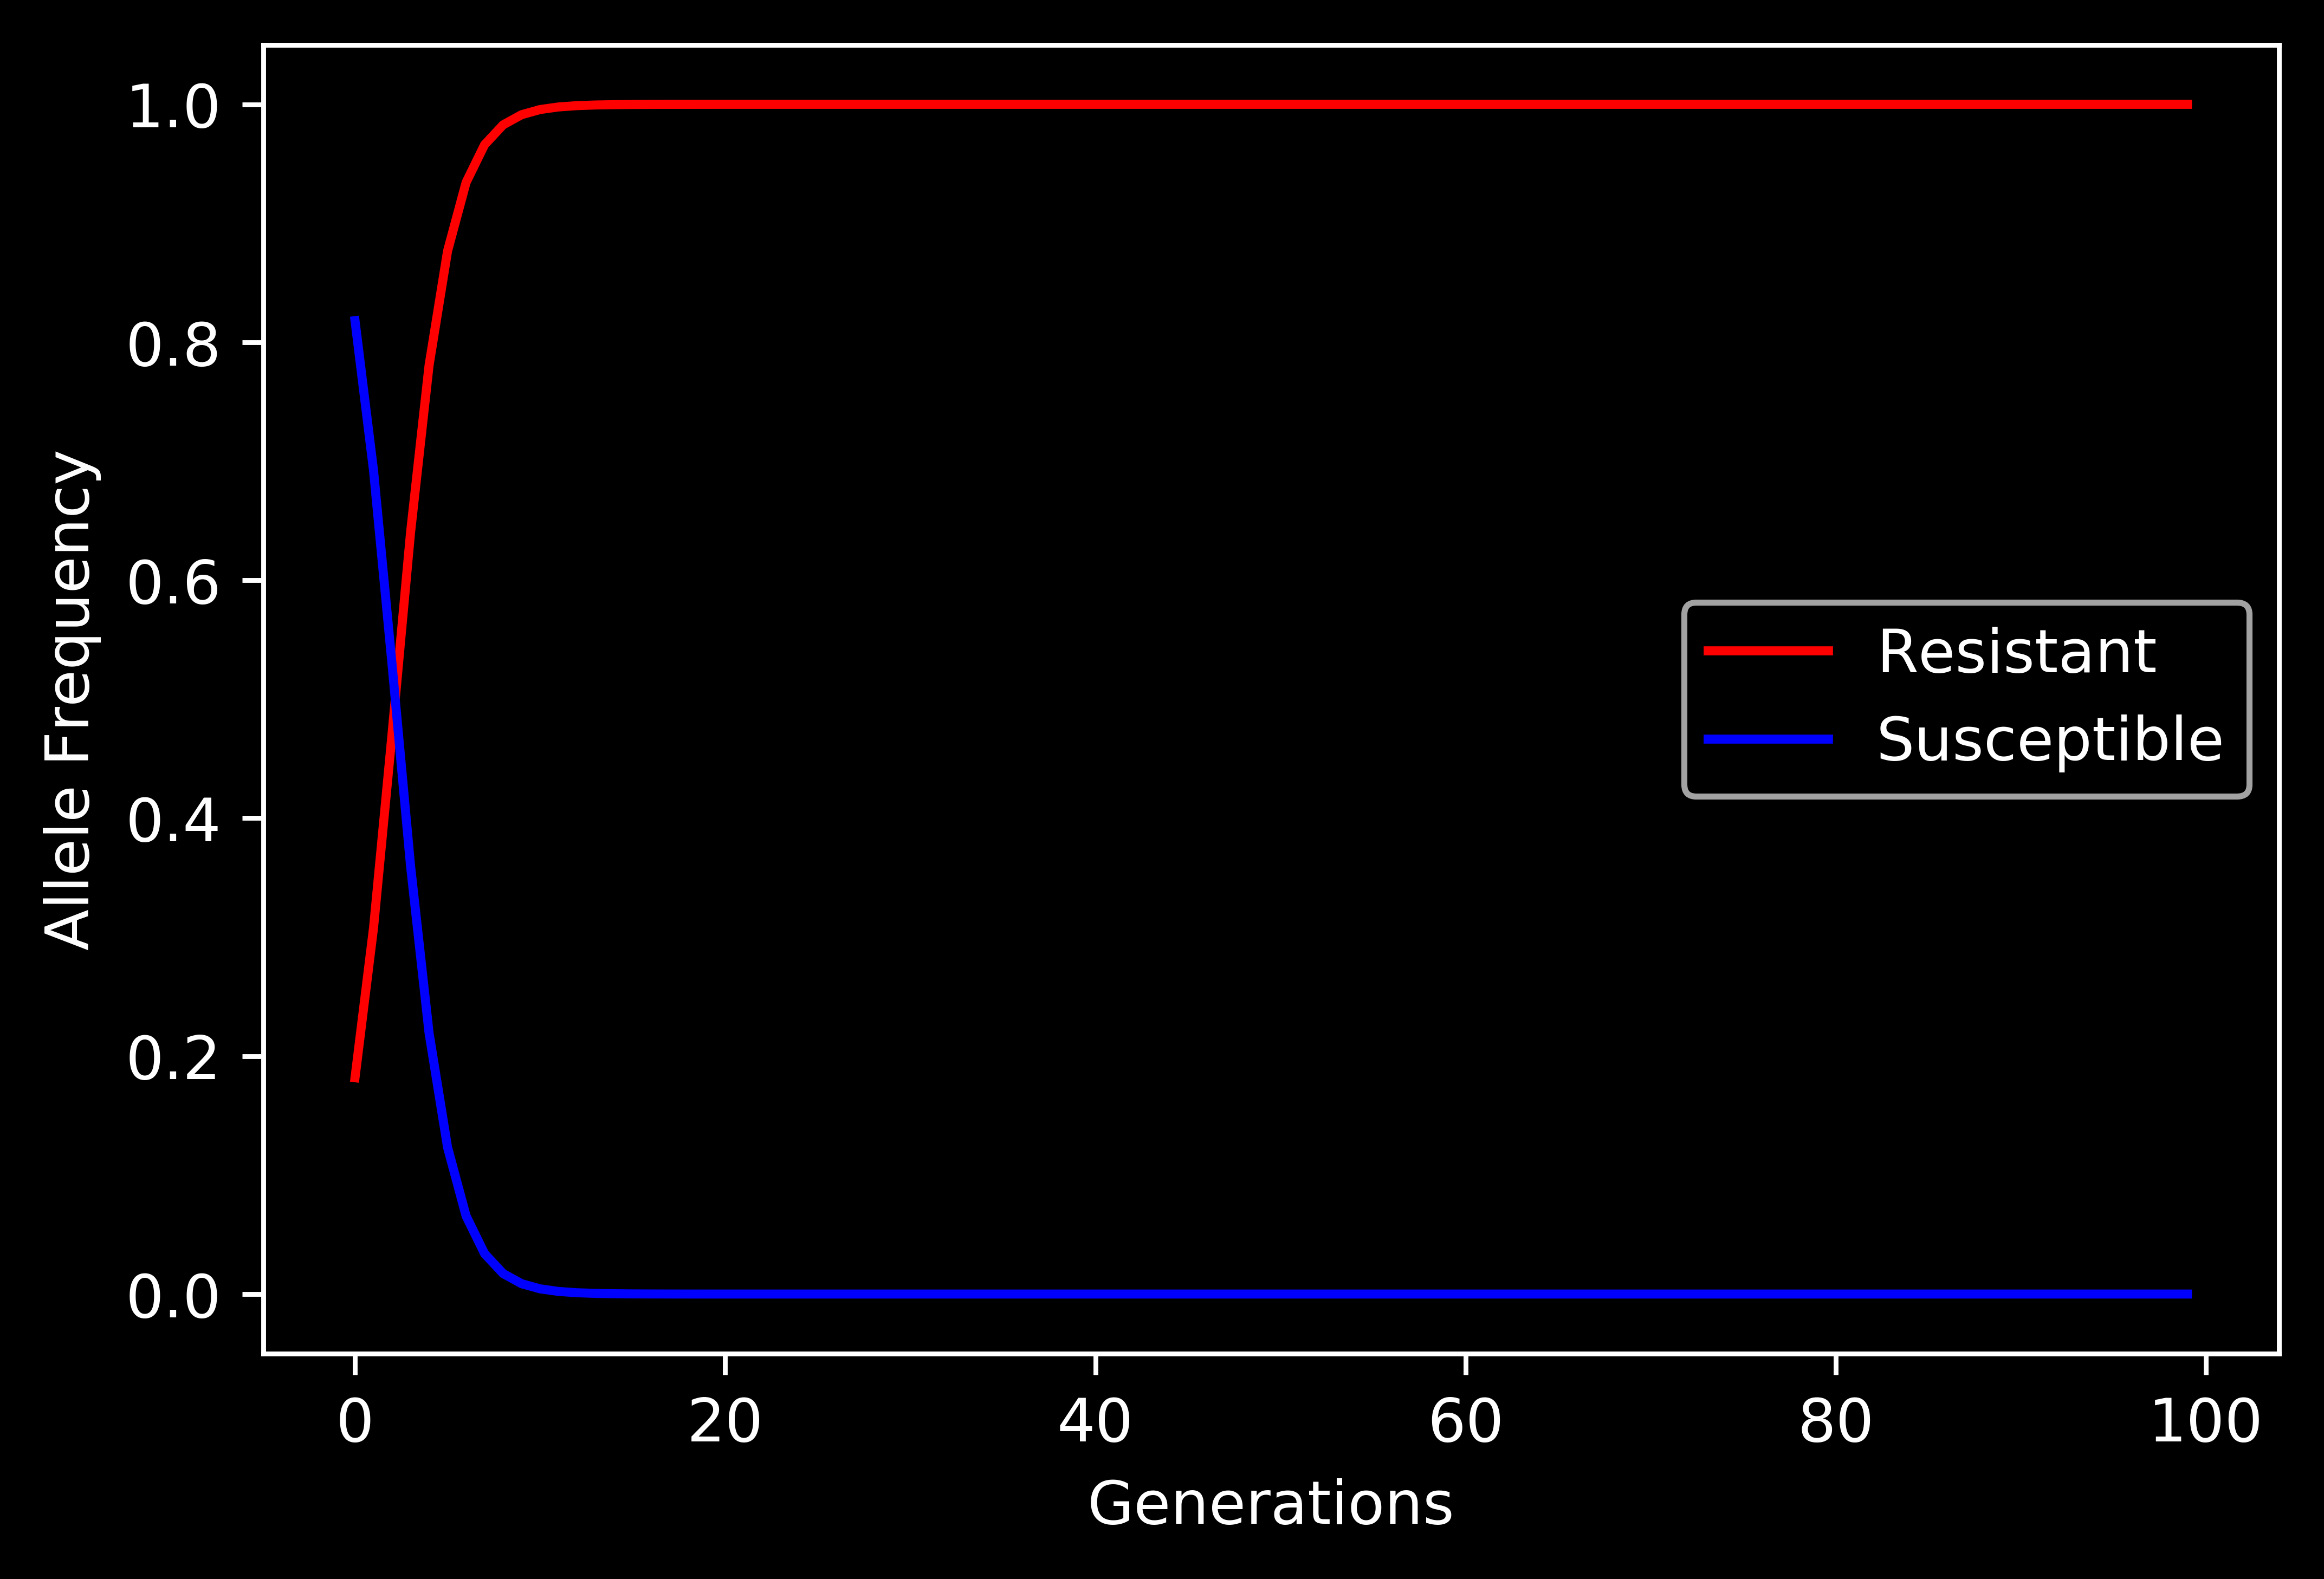

In [30]:


def simulate_selection_on_haploid(f_R,f_S,W_R,W_S,generations=100):
    """Return a list of allele frequency p over time in haploids
    
    f_R -- the allele frequency of the first allele (e.g. allele R)
    f_S -- the allele frequency of the second allele (e.g. allele S)
    W_R -- the relative fitness of the phenotype of the first allele
    W_S -- the relative fitness of the phenotype of the second allele
    generations -- number of generations to run the simulation
    """
    curr_allele_frequency = f_R

    #Before we start our loop
    #set up empty lists to hold 
    #results over time
    xs = []
    f_Rs = []
    f_Ss = []

    #Simulate allele change in each generation
    for g in range(generations):
        curr_allele_frequency = selection_on_haploid(curr_allele_frequency,
          1.0 - curr_allele_frequency,W_R,W_S)
    
        xs.append(g)
        f_Rs.append(curr_allele_frequency)
        f_Ss.append(1.0-curr_allele_frequency)
    
    return xs,f_Rs,f_Ss


#Set up input parameters
f_R = 0.10 #frequency of R
f_S = 0.90 #frequnecy of S
W_R = 1.0  #relative fitness of R
W_S = 0.5  #relative fitness of S
generations = 50 

xs,f_Rs,f_Ss = simulate_selection_on_haploid(f_R,f_S,W_R,W_S,generations=100)

#Plot the result
figure(dpi = 800)
plot(xs,f_Rs,'-r',label = 'Resistant')
plot(xs,f_Ss,'-b',label = 'Susceptible')
legend()
xlabel('Generations')
ylabel('Allele Frequency')

    
    

### Selection in a diploid organism

When Darwin formulated the theory of evolution by natural selection, the source of variation was a tough problem. Several solutions proposed at the time -- like Darwin's notion (following Lamark) that the environment modified an organisms genetics and those changes could be inherited -- were tested and abandoned. 

The **modern synthesis** in the 1930s combined Darwin's theory of evolution by natural selection with **mutation** as the source of biological variation, and inheritance following the **genetic** rules of inheritance derived from Gregor Mendel's work on inheritance in pea plants.

As this next section requires a bit more theory, let us talk briefly about the key concepts we'll need to extend our model to diploid organisms. Diploid organisms, as we noted above, by definition have two copies of each chromosome. Because all genetic information is encoded on a physical chromosome, this implies that diploid organisms have two copies of each allele (I am ignoring for the moment some important exceptions like sex chromosomes). During sexual reproduction, one copy comes from each parent.

This means that -- unlike in haploids -- we cannot represent the **genotype** of a particular organism with just R or S. It must instead either be RR, RS, or SS. Organisms that have two copies of the same allele -- like individuals that are RR or SS -- are called *homozygous* because they have the same (*homo*) allele on each chromosome. RS organisms are called *heterozygous* because they have different (*hetero*) alleles on the two chromosomes.

#### Moving from allele frequencies to genotype frequencies using Hardy-Weinberg Equilibrium

Under certain simplifying assumptions, called **Hardy-Weinberg Equilibrium** it is possible to predict the frequency of each genotype given the frequency of the alleles that compose it. If the conditions of Hardy-Weinberg Equilibrium hold for a set of two alleles at the same locus in a diploid organism, and if *p* represents the frequency of the allele A1 and *q* represents the frequency of allele A2, then the frequencies of the genotypes will be:

freq(A1A1) = p^2

freq(A1A2) = 2pq

freq(A2A2) = q^2

Because the above list comprises all possible genotypes, it follows that the genotype frequencies above sum to 1.0:

p^2 + 2pq + q^2 = 1.0

#### Modelling how genotypes translate into phenotypes

Critically, selection does not act on the genotype directly. Instead, that genotype -- in interaction with its environmental context -- is translated into a phenotype or set of realized characters . The way in which different genotypes translate into phenotypes is called the **mode of inheritance**.

For our purposes of modelling selection in diploids, we care most about how the fitness values Wpp, Wpq and Wqq differ under different modes of inheritance. 

The simplest type of inhertiance - the one first discovered by Gregor Mendel in pea plants - is called Complete Mendelian Dominance. In this mode of inheritance, one allele is dominant over another. In heterozygotes, the dominant allele determines the phenotype. In our above example if R were dominant to S, then RS heterozygotes would show the phhenotype -- the same level of antibiotic resistance -- as RR individuals - even though they only have one R allele. Because RS and RR individuals both show the same phenotype, we would expect them to have the same fitness. So if R showed complete Mendelian Domiance over S, we would expect Wpp == Wpq.

Other modes of inheritance are described below:

**Recessive** -- heterozygotes show the same phenotype as homozygotes for the other allele. So if R is recessive to S, then RS heterozygotes would be identical to SS homozygotes, and so be susceptible to the antibiotic. Therefore we expect Wpq == Wqq (the opposite of Dominance)

**Incomplete Dominance** -- in incomplete dominance, RS heterozygotes show an intermediate phenotype between RR and SS. If we observe Wpp > Wpq > Wqq we can rule out a purely dominant or recessive trait (since in that case Wpq == Wpp or Wpq == Wqq), and might instead suspect incomplete dominance or codominance (below)

**Codominance** -- if two alleles are co-dominant, then heterozygotes show a mosaic or patchwork of both phenotypes. For example, for an allele governing color codominance might result in a patchy pattern.

This is far from an exclusive list of patterns of inheritance, but it should at least help to illustrate how Mendelian inheritance works. It is worth noting at this point that the above is a useful simplification - in reality more complex patterns of inheritance are possible, and an organisms environment (not just its genetics) can influence how many genotypes translate into phenotypes.

### Summary

Diploids have two copies of each genetic variant or **allele**. The set of alleles is called the **genotype**. These genotypes often map to phenotypes -- the actual observed traits of the organism -- following a pattern of inheritance (dominant, recessive, incomplete dominance or codominance. Natural selection acts on phenotypes not genotypes, so if we want to understand fitness we have to also understand how genotypes translate into phenotypes.

#### Designing the simulation.

We now have the basic background we need to develop a more sophisticated simulation of the evolution of our antibiotic resistance allele if the organism is diploid.

**Goal**: determine the allele frequency of an allele in a population over the generations. We will assume that criteria for Hardy-Weingberg equilibrium are met *except* for the presence of selection.

**Procedure**:

1. Write a function to simulate the change in allele frequency in one generation
2. Run that function over the desired number of generations to generate a list of  allele frequencies over time.
3. Graph that result.


**Writing a function for the allele frequency change in one generation**

To review, we previously calculated how selection would change the frequency of allele R in haploids by multiplying the frequency of the R genotype by its fitness and then dividing by the same for each allele.  Now we will do the same again- the only trick is that now there are 3 possible genotypes (RR, RS, or SS) and 3 possible fitnesses (Wrr, Wrs, or Wss) instead of just 2 possible genotypes (R or S) and 2 possible fitnesses (Wr and Ws). 

All this is summarized in the equation for Hardy-Weinberg equilibrium, modified to account for selection:

\begin{equation*}
p'   =  \frac{p^2*Wpp + (1/2)2pq*Wpq + q^2*Wqq}{p^2*Wpp + 2pq*Wpq + q^2*Wqq}
\end{equation*}

(Note that  the RS genotype contributes only half as many R alleles as the RR genotype to the next generation, so the numerator multiplies the term for the number of surviving RS genotypes by 1/2) 

This equation can be written as a python function as follows:


In [18]:
def HW_with_selection(p,q,Wpp,Wpq,Wqq):
    """Return the new frequency of p given Hardy-Weinberg equilibrium + selection
    
    p -- allele frequency of allele A1
    q -- allele frequency of allele A2
    Wpp -- fitness of A1A1 homozygotes
    Wpq -- fitness of A1A2 heterozygotes
    Wqq -- fitness of A2A2 homozgyotes
    """
    numerator = (p**2)*Wpp + p*q*Wpq 
    denominator = (p**2)*Wpp + 2*p*q*Wpq + (q**2)*Wqq
    
    p_prime = numerator/denominator
    return p_prime

** Run the simulation over 100 generations**. Now that we can get allele frequencies in the next generation from the previous one, we can run the simulation over many generations in a for loop:

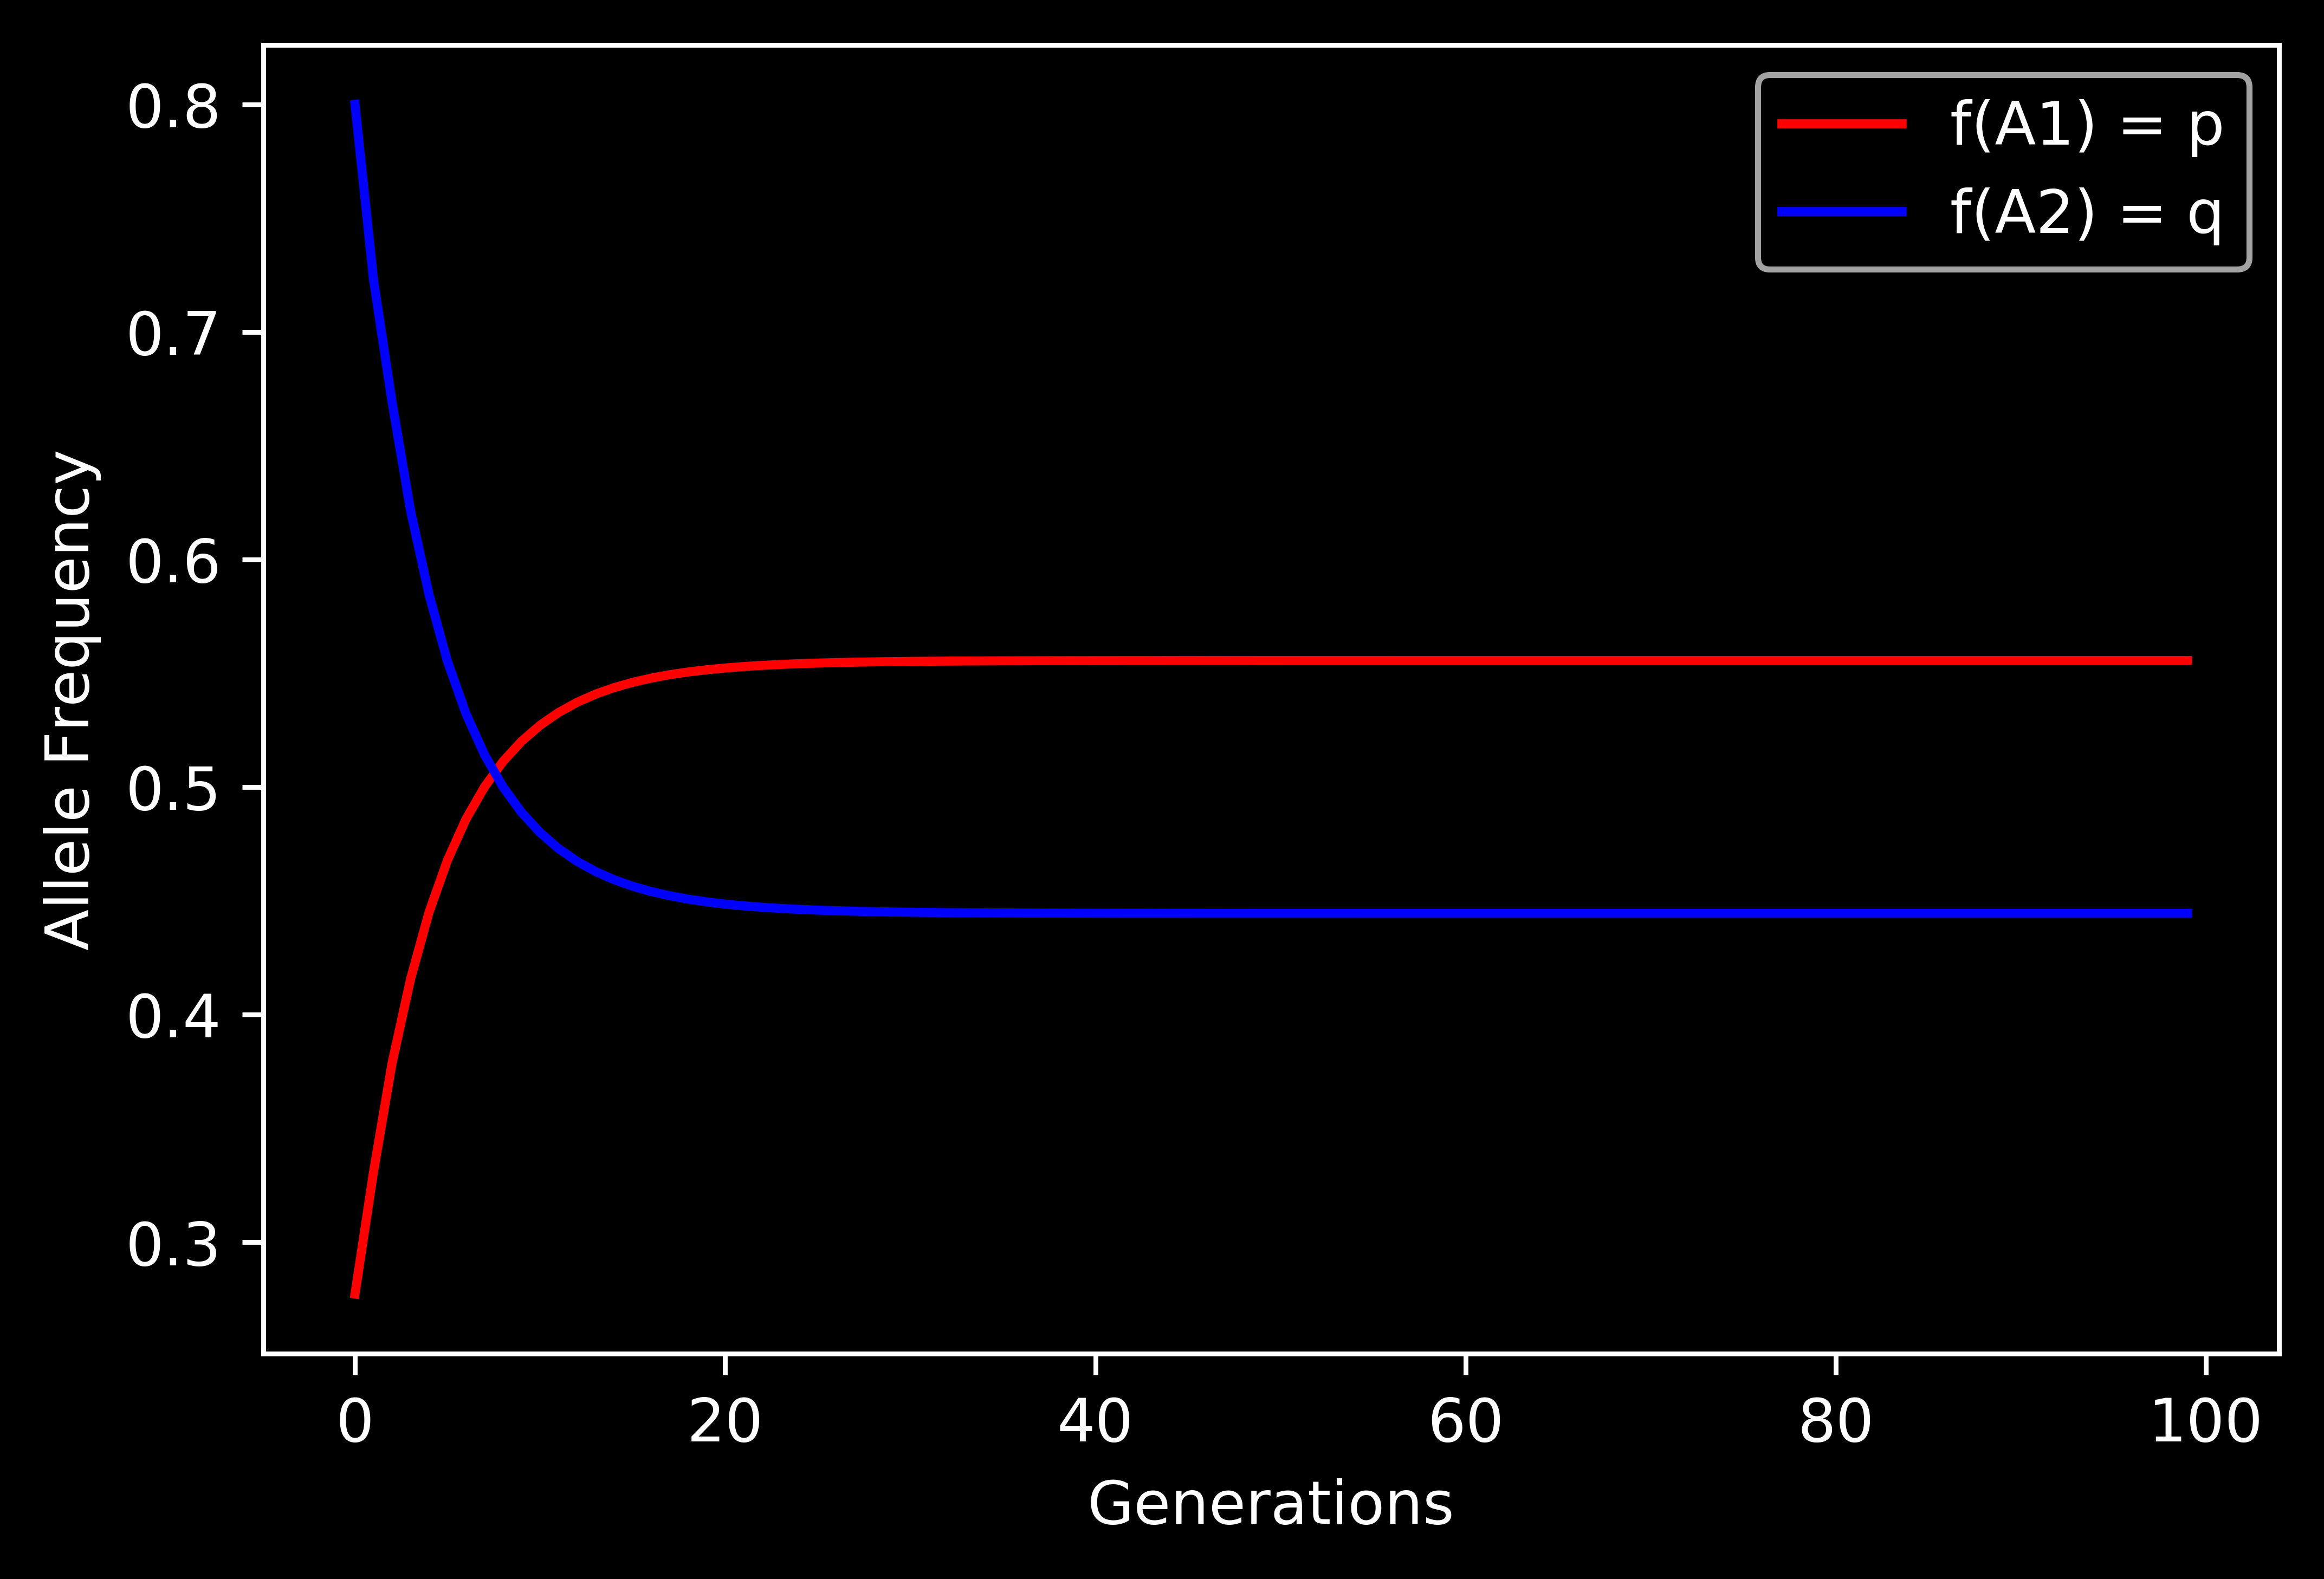

In [27]:
def simulate_HW_with_selection_over_time(p,q,Wpp,Wpq,Wqq,generations=100):
    """Return the new frequency of p given Hardy-Weinberg equilibrium + selection
    
    p -- allele frequency of allele A1
    q -- allele frequency of allele A2
    Wpp -- fitness of A1A1 homozygotes
    Wpq -- fitness of A1A2 heterozygotes
    Wqq -- fitness of A2A2 homozgyotes
    generations -- the number of generations to simulate.
    """
    #Make empty lists to hold our results
    xs = []
    ps = []
    qs = []

    for g in range(generations):
        new_p = HW_with_selection(p,q,Wpp,Wpq,Wqq)
        xs.append(g)
        ps.append(new_p)
        q = 1.0 - p
        qs.append(q)
        p = new_p
    return xs,ps,qs
 
Wpp = 0.6
Wpq = 1.0
Wqq = 0.5
p = 0.2
q = 0.8

xs,ps,qs = simulate_HW_with_selection_over_time(p,q,Wpp,Wpq,Wqq,generations=100)

figure(dpi=800)    
plot(xs,ps,'-r',label='f(A1) = p')
plot(xs,qs,'-b',label='f(A2) = q')
ylabel('Allele Frequency')
xlabel('Generations')
legend()

### How does ploidy influence the evolution of antibiotic resistance?

Given our above assumptions, we can now use our code to study how quickly antibiotic resistance alleles spread in diploids vs. haploids:

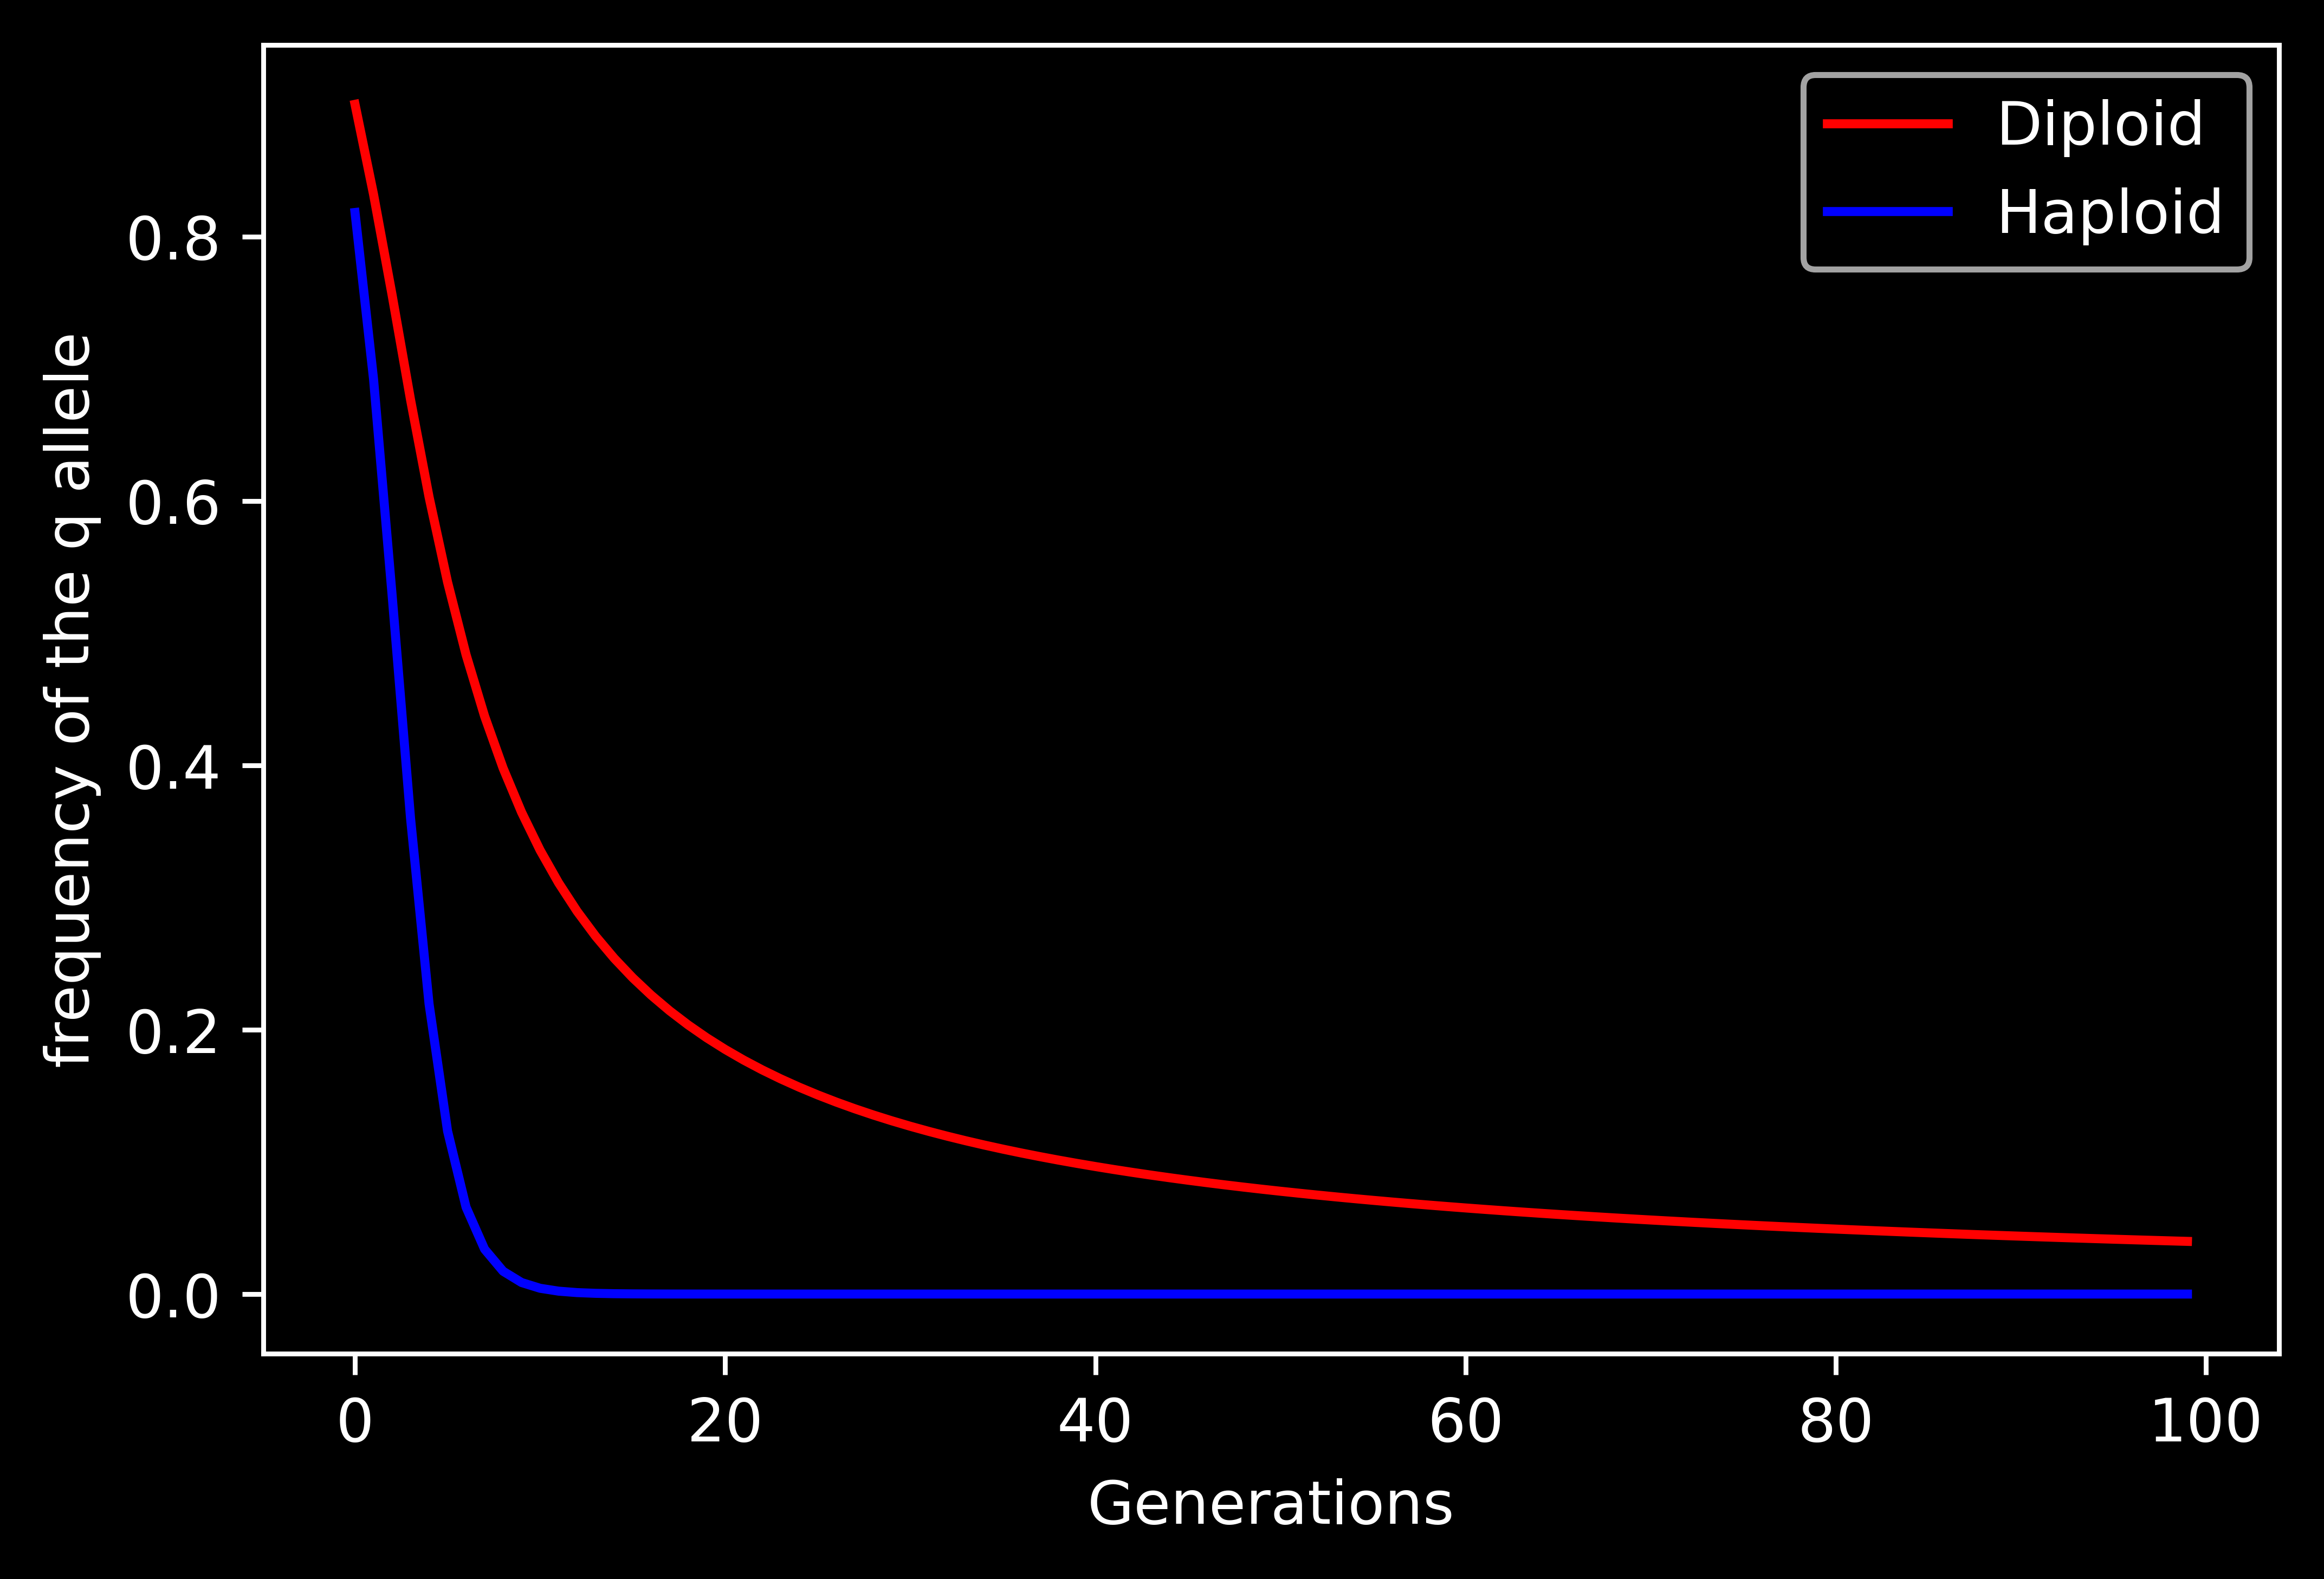

In [31]:
figure(dpi = 800)

#Simulate for diploids
generations = 200
Wpp = 1.0
Wpq = 1.0
Wqq = 0.50
p = 0.1
q = 0.9

xs,ps_diploid,qs_diploid =\
  simulate_HW_with_selection_over_time(p,q,Wpp,Wpq,Wqq,generations=100)

#simulate for haploids

Wp = 1.0
Wq = 0.50
p = 0.1
q = 0.9
   
xs,ps_haploid,qs_haploid = simulate_selection_on_haploid(p,q,Wp,Wq,generations=100)

#Now let's compare our results by taking a difference.
   
sex_diff = [qs_haploid[i] - qs_diploid[i] for i in range(len(ps_diploid))]    
plot(xs,qs_diploid,'-r',label="Diploid")
plot(xs,qs_haploid,'-b',label="Haploid")
ylabel("frequency of the q allele")
xlabel("Generations")
legend()


Text(0, 0.5, 'q alleles in haploid relative to diploid \n (f(q) for haploid - f(q) for diploid)')

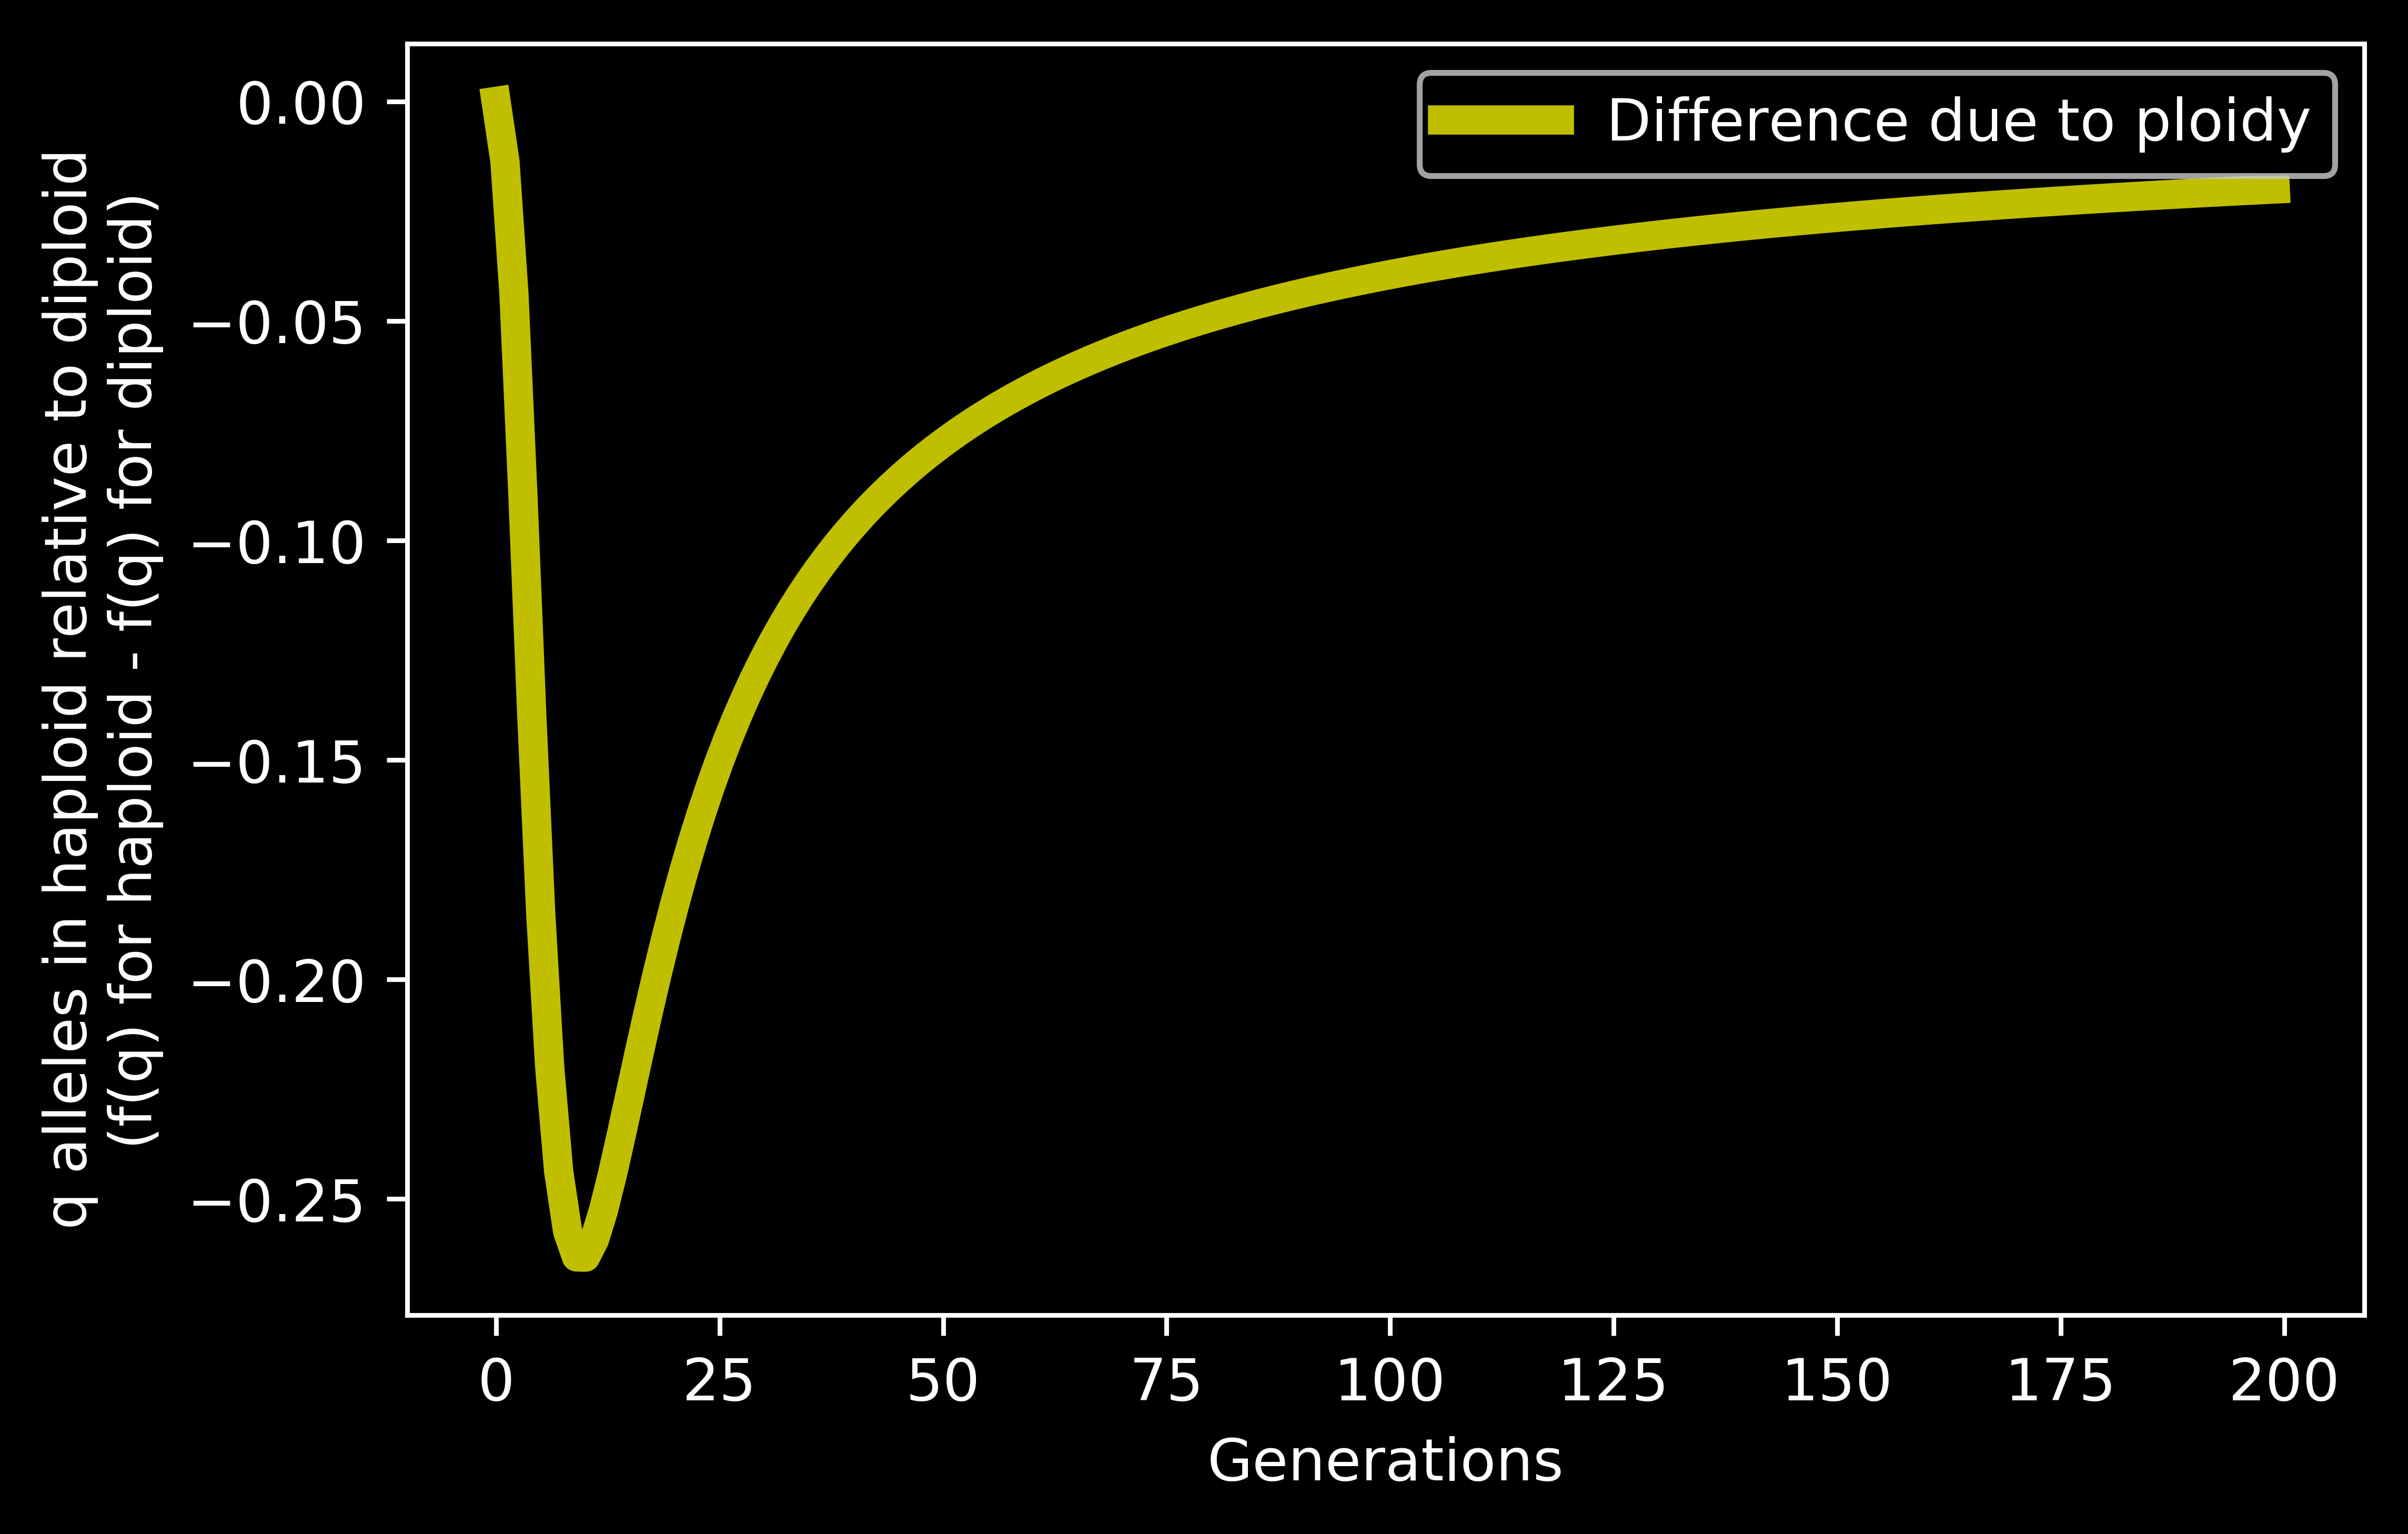

In [21]:
#Show the difference due to ploidy
figure(dpi=800)
plot(xs,sex_diff,'-y',label = "Difference due to ploidy",linewidth=5)
legend()
xlabel("Generations")
ylabel("q alleles in haploid relative to diploid \n (f(q) for haploid - f(q) for diploid)")

#### Interpreting the results

The above simulation shows that haploids lose the susceptible S allele (represented in the frequency q) much more quickly than diploids, even though selection on the resistant or susceptible phenotypes was the same. Consider why this might be given what you know about selection and inheritance above.

The key difference is that in diploids, heterozygous RS individuals still contribute some S alleles to the next generation, but are themselves not susceptible to the antibiotic (since the trait is dominant). 

### Simulating genetic drift

The above simulations all assume infinte population sizes. For example, they say that f(A1A1) is exactly f(A1)*f(A1), but in a small population this is not quite right

#### Low populations sizes mean Hardy-Weinberg predictions are inexact.

The Hardy-Weinberg prediction for the frequency of A1A1 genotypes is f(A1)*f(A1). But that assumes an infinite population size. Let's simulate random mating without selection or migration or mutation, and see what happens if we have a population size that is much less than infinite.



In [11]:
from collections import defaultdict

def random_genotype(f_A1):
    if random() <= f_A1:
        sperm_allele = 'A1'
    else:
        sperm_allele = 'A2'
    
    if random() <= f_A1:
        egg_allele = 'A1'
    else:
        egg_allele = 'A2'
    
    genotype = sperm_allele+egg_allele
    return genotype


def simulate_random_mating(pop_sizes,f_A1):
    genotypes = defaultdict(int)
    
    for i in range(pop_sizes):
        curr_genotype = random_genotype(f_A1)
        genotypes[curr_genotype]+=1
    
    for g in genotypes.keys():
        genotypes[g] = genotypes[g]/float(pop_size)
    
    return genotypes

def simulate_genetic_drift(n_generations,f_A1=0.5,pop_size=100):
    """Return the frequency of f_A1 over generations"""
    generations = range(n_generations)
    allele_freqs = []
    for generation in generations:
        genotypes = None
        #print(pop_size)
        genotypes = simulate_random_mating(pop_size,f_A1)
        #print(genotypes)
        numerator = (genotypes['A1A1']+0.5*genotypes['A1A2']+0.5*genotypes['A2A1'])
        denominator = (genotypes['A1A1']+genotypes['A1A2']+genotypes['A2A1']+genotypes['A2A2'])
        #print("Numerator:",numerator)
        #print("Denominator:",denominator)
        f_A1 = numerator/denominator       
        allele_freqs.append(f_A1)
    return list(generations),allele_freqs
    
    

Now let's run the simulation for a variety of population sizes:

Simulating pop_size:5
Simulating pop_size:50
Simulating pop_size:500
Simulating pop_size:5000


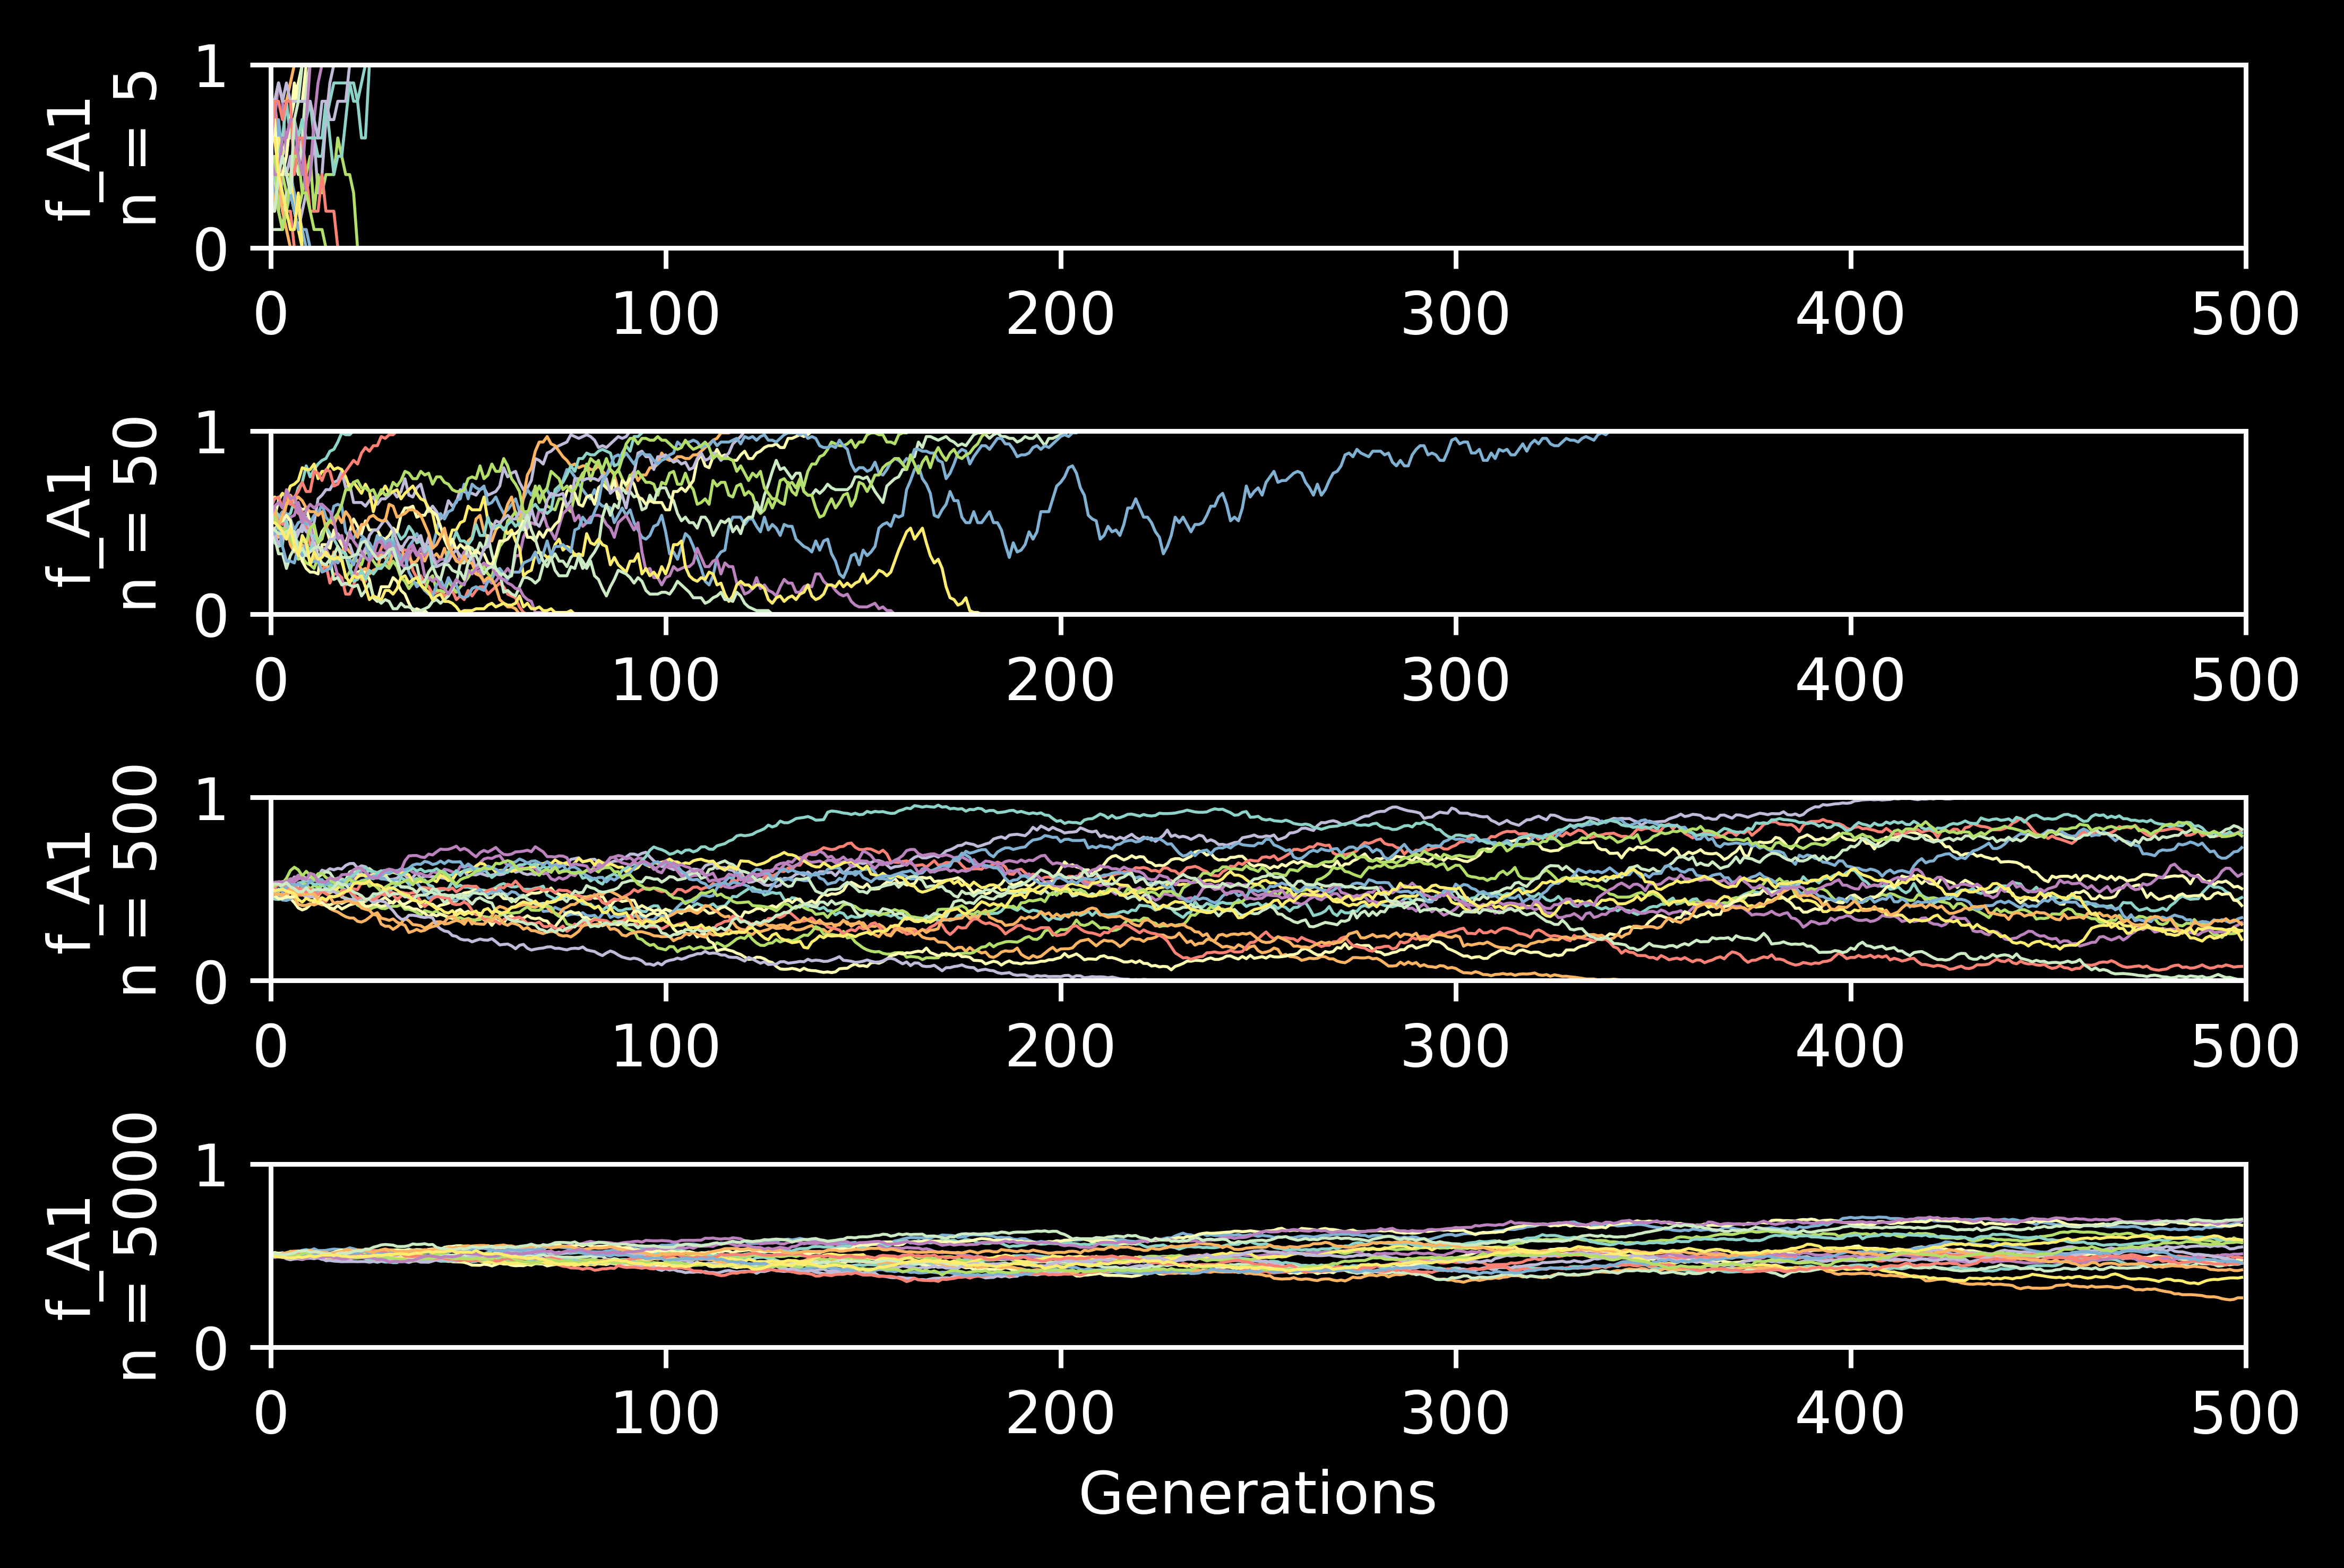

In [18]:



f_A1 = 0.5
pop_sizes = [5,50,500,5000]
generations = 500
replicates = 20

#Set up a figure to graph the data
figure(1,dpi=800)
for i,pop_size in enumerate(pop_sizes):
    print("Simulating pop_size:%i"%pop_size)
    #Make a subplot with one column and one row per population size. 
    nrows = len(pop_sizes)
    ncols = 1
    subplot(nrows,ncols,i+1) 
    ylabel("f_A1\n n = %i" %pop_size)  
    for replicate in range(replicates):
        xs,ys = simulate_genetic_drift(generations,f_A1,pop_size)
        plot(xs,ys,'-',label = "f(A1) pop = %i"%pop_size,linewidth=0.5)
        #Set x-axis limits
        xlim(0,generations)
        #Set y-axis limits
        ylim (0.0,1.0)
#legend()
xlabel("Generations")

#Leave more space between subplots so they don't overlap
subplots_adjust(hspace=1.00)





#### Genetic Drift 

Let's look at the figures produced up above. Each graph from top to bottom shows the frequency of allele A1 changing over 500 generations in 20 replicate populations. (Replicate here just means that these are 20 *separate* populations - like flies breeding in different test tubes or lizards on different islands - that don't influence each other at all). The *only difference* between these graphs is the population size. There are several really important things to notice here...

Yet you can see that the frequency of allele A1 differs quite a bit between these replicates. You may also see that random drift in the frequency of allele A1 is stronger in 

##### Genetic drift can cause variation 

There are several things to notice here. First, each line takes a somewhat different path. That means that given the same exact parameters (same pop. size, same allele frequency, same selective regime, etc) evolution has taken a slightly different course in each population. Importantly, we've shown that this can happen *without* mutation and *without* migration. Why then is the allele frequency changing over time?

##### Genetic drift can occur due to sampling effects during sexual reproduction

We haven't yet introduced any mutation or migration at all into the population so we've shown that genetic drift *does not* depend on mutation or migration. This is a very important point, and one that is often mixed up by folks learning about genetic drift for the first time.

Yet despite the absence of mutation and migration, each replicate population differs from the others. Those differences compound over generations, causing populations to 'drift' randomly in allele frequency. 

In our simulation the true cause is what's called a sampling effect: while the probability of getting an A1A1 phenotype when crossing two A1A2 heterozygotes is 0.25, if we only have 4 offspring it will be fairly common for 0,1,2,3 or even 4 of them to be A1A1. So the *observed* count of A1A1 can be anywhere from 0-100%, even though the *expected* frequency is exactly 1. The same thing happens at a population level:  _when the number of observations is anything less than infinite the observed counts for each genotype won't perfectly match the expected counts of each genotype._ But it is the observed genotypes (i.e. the ones that actually occur in the organisms) that will be passed on to the next generation. Therefore this process changes allele frequencies.




## Combining drift and selection

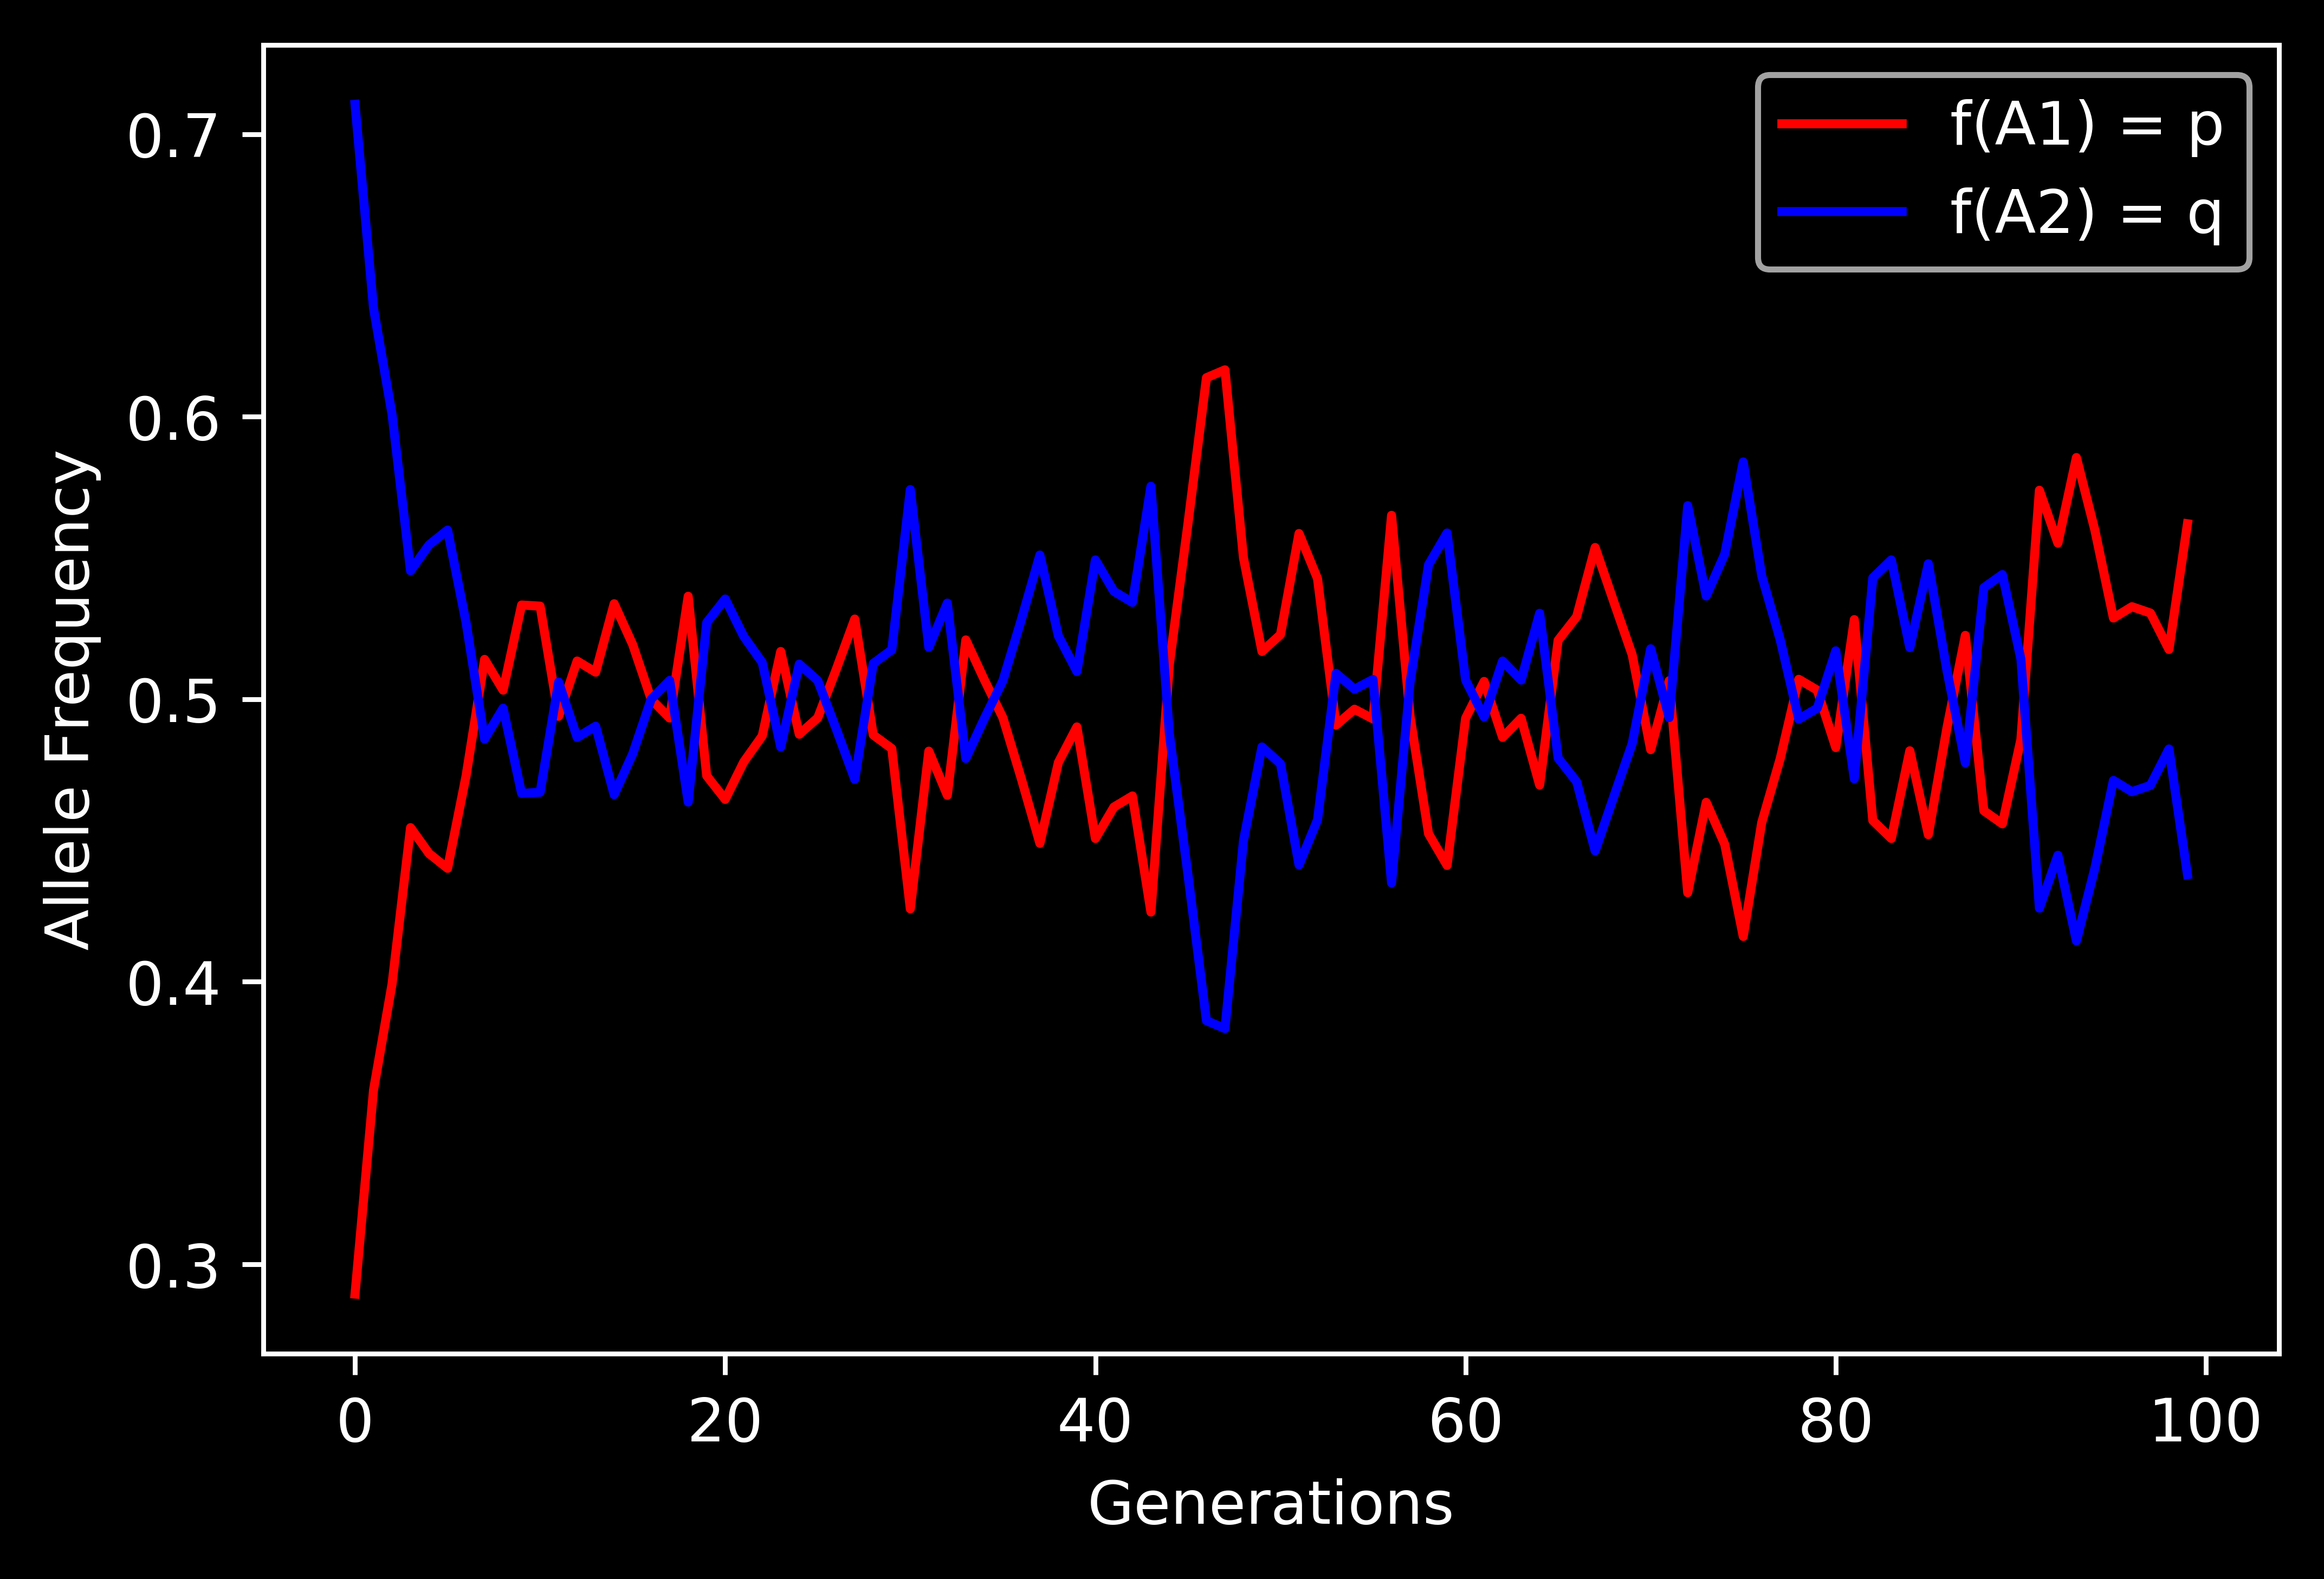

In [21]:
def simulate_genetic_drift_with_selection(n_generations,f_A1=0.5,pop_size=100,\
                                          Wpp=1.0,Wpq=1.0,Wqq = 1.0):
    """Return the frequency of f_A1 over generations"""
    generations = range(n_generations)
    allele_freqs = []
    for generation in generations:
        genotypes = None
        #print(pop_size)
        genotypes = simulate_random_mating(pop_size,f_A1)
        #print(genotypes)
        numerator = (genotypes['A1A1']*Wpp+\
                     0.5*genotypes['A1A2']*Wpq+\
                     0.5*genotypes['A2A1']*Wqq)
        
        denominator = (genotypes['A1A1']*Wpp+\
                       genotypes['A1A2']*Wpq+\
                       genotypes['A2A1']*Wpq+\
                       genotypes['A2A2']*Wqq)
        #print("Numerator:",numerator)
        #print("Denominator:",denominator)
        f_A1 = numerator/denominator       
        allele_freqs.append(f_A1)
    return list(generations),allele_freqs

def simulate_random_mating(pop_sizes,f_A1):
    genotypes = defaultdict(int)
    
    for i in range(pop_sizes):
        curr_genotype = random_genotype(f_A1)
        genotypes[curr_genotype]+=1
    
    for g in genotypes.keys():
        genotypes[g] = genotypes[g]/float(pop_size)
    
    return genotypes

def simulate_genetic_drift(n_generations,f_A1=0.5,pop_size=100):
    """Return the frequency of f_A1 over generations"""
    generations = range(n_generations)
    allele_freqs = []
    for generation in generations:
        genotypes = None
        #print(pop_size)
        genotypes = simulate_random_mating(pop_size,f_A1)
        #print(genotypes)
        numerator = (genotypes['A1A1']+0.5*genotypes['A1A2']+0.5*genotypes['A2A1'])
        denominator = (genotypes['A1A1']+genotypes['A1A2']+genotypes['A2A1']+genotypes['A2A2'])
        #print("Numerator:",numerator)
        #print("Denominator:",denominator)
        f_A1 = numerator/denominator       
        allele_freqs.append(f_A1)
    return list(generations),allele_freqs


Wpp = 0.1
Wpq = 0.1
Wqq = 0.0
p = 0.2
q = 0.8
n_generations = 100

xs,ps = simulate_genetic_drift_with_selection(n_generations,p,200,Wpp,Wpq,Wqq)
qs = [1.0 - p for p in ps]
figure(dpi=800)    
plot(xs,ps,'-r',label='f(A1) = p')
plot(xs,qs,'-b',label='f(A2) = q')
ylabel('Allele Frequency')
xlabel('Generations')
legend()

### Maintenance of a harmful allele

Some alleles produce harmful phenotypes when present in two copies, yet seem to persist in populations for extended periods of time. Why might this be?

There are several answers, but two of the most important ones are heterozygote advantage and mutation/selection balance.

We'll simulate a harmful allele below and show that under certain conditions it can be maintained in the population indefinitely.

#### Simulating heterozygote advantage

Heterozygote advantage or overdominance occurs when the fitnes of the heterozygote is greater than either homozygote. Because the fitness of the heterozygote and each homozygote is different, heterozygote advantage by definition cannot happen if an allele shows complete Mendelian dominance. In the case of complete Mendelian dominance the phenotype of the heterozygote and the homozygous dominant individuals are the same. Because selection acts on the phenotype not then genotype, then the homozygous dominant and heterozygous individuals must have the same phenotype.



Text(0.5, 0, 'Generations')

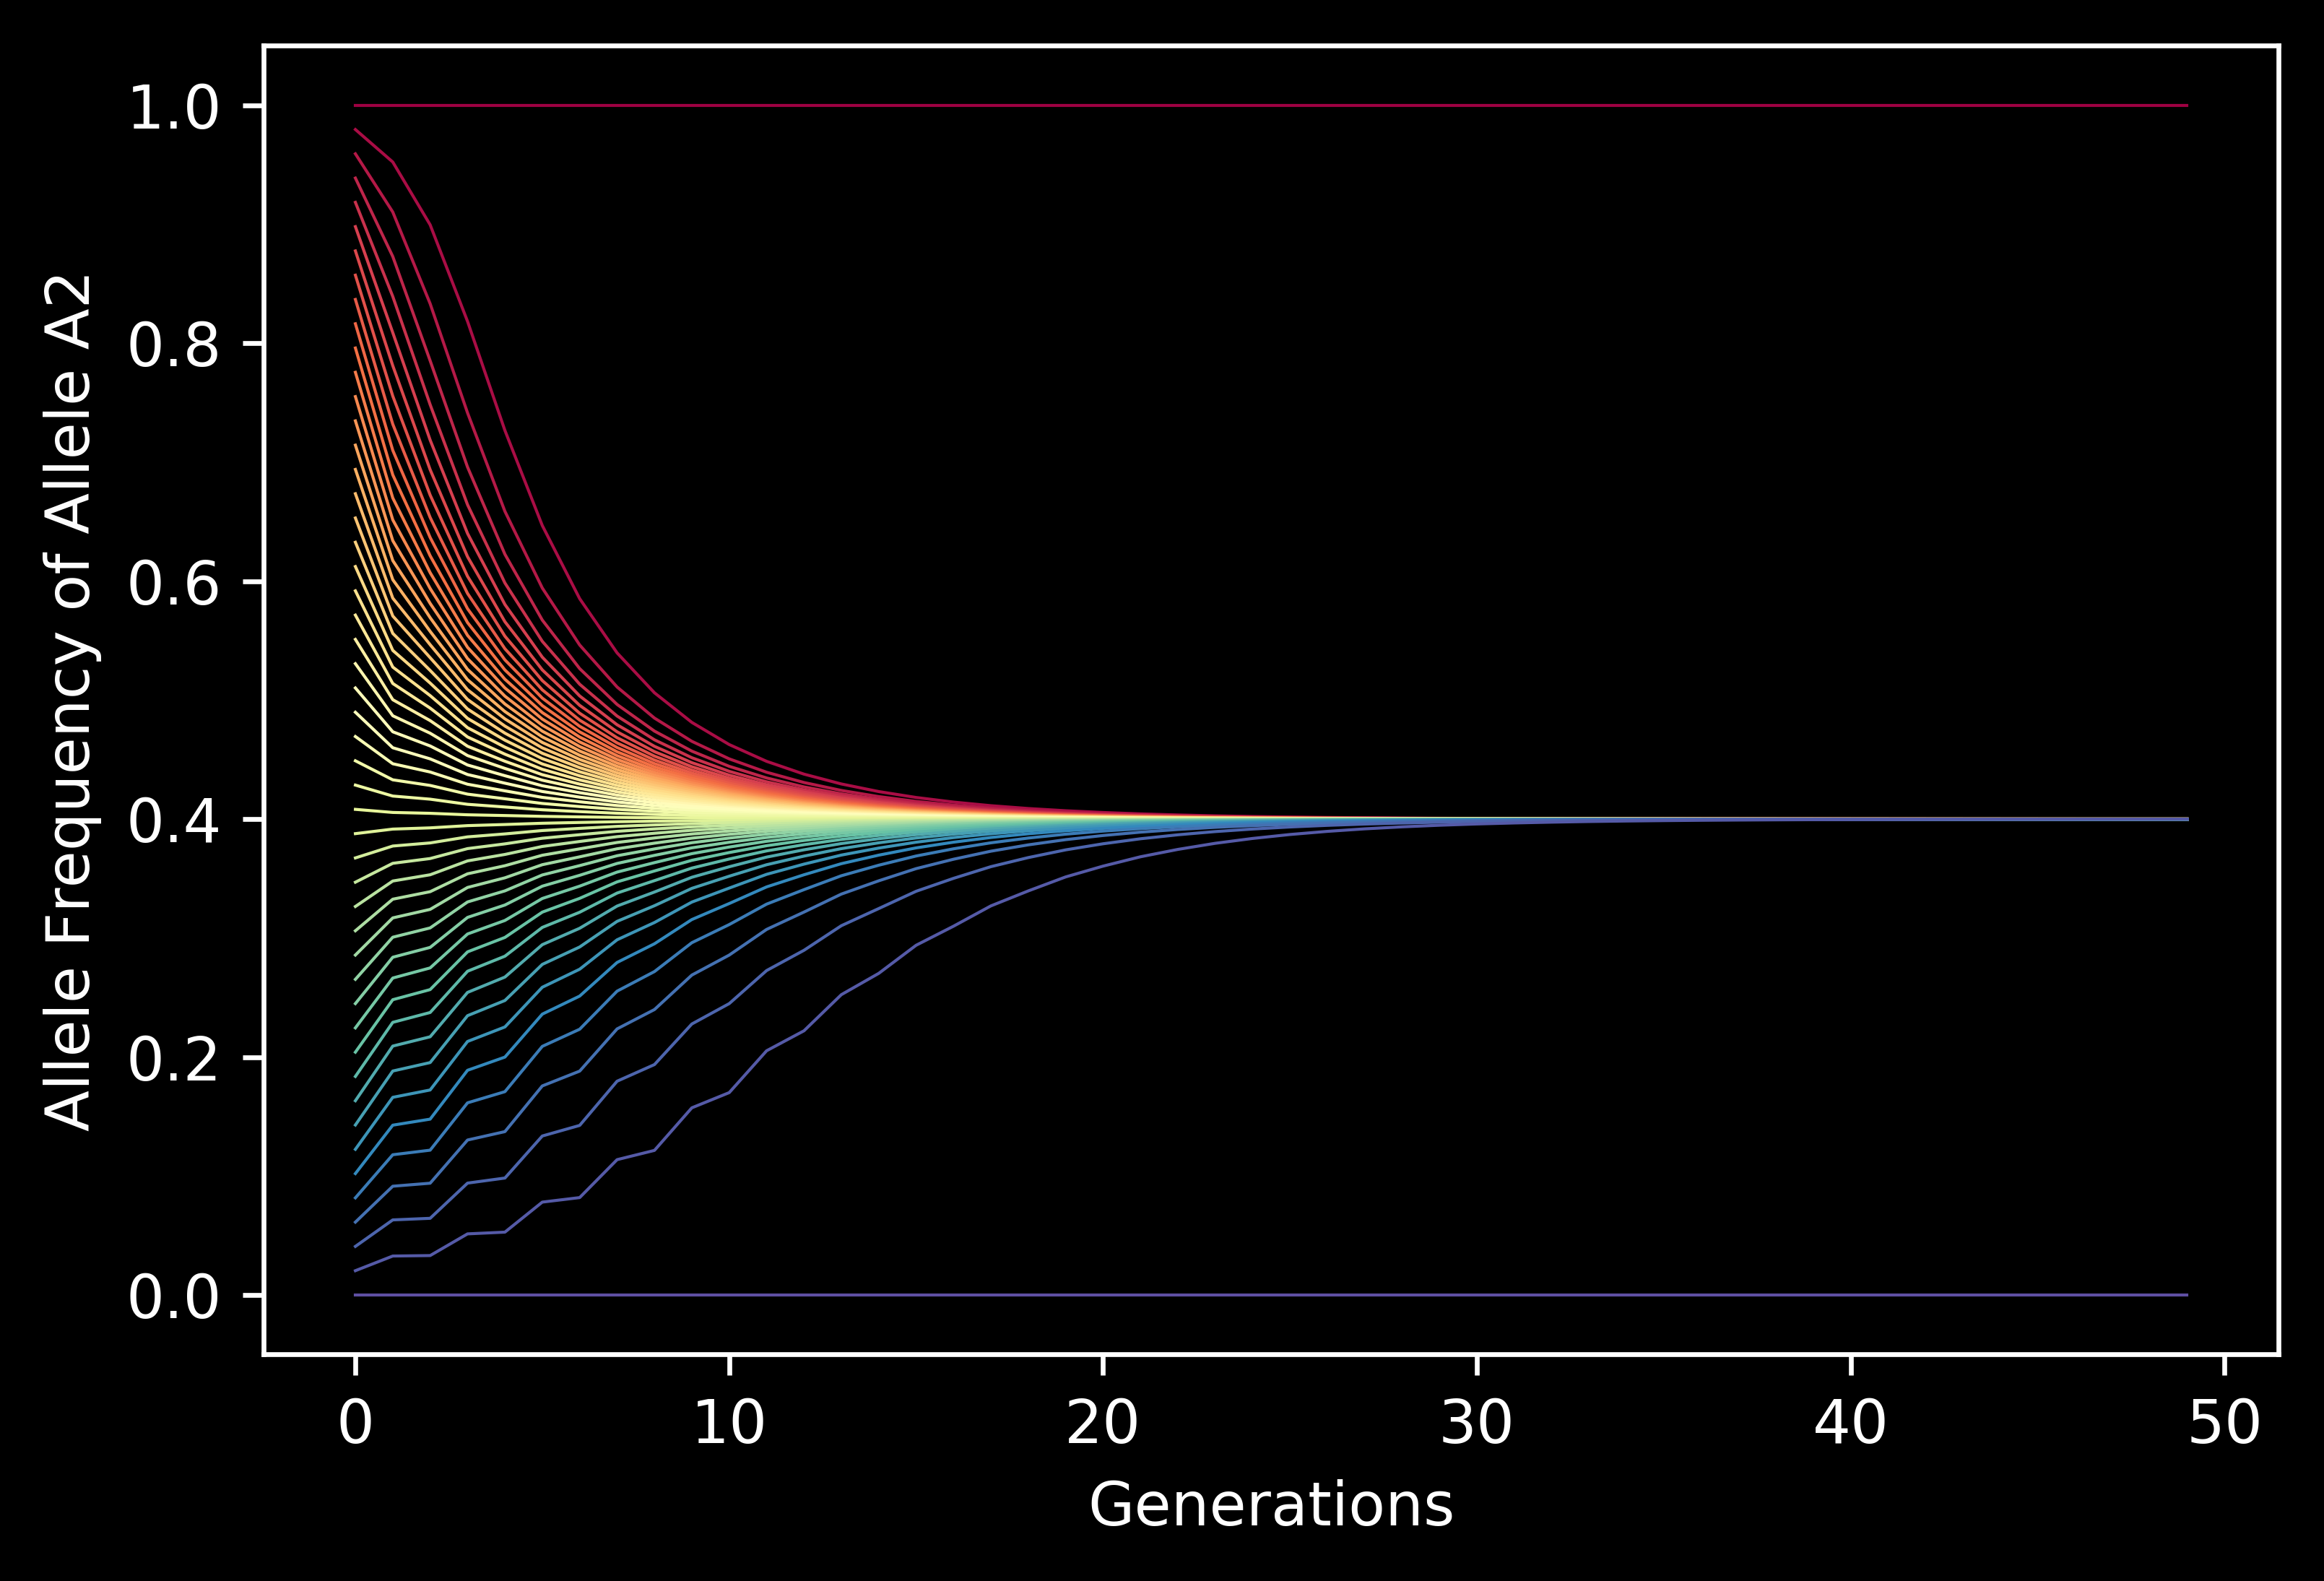

In [9]:
### Heterozygote advantage

generations = 50

#Define s as fitness cost of pp heterozygote
#CAUTION: different resources flop s and t in their equations

s = 0.6 
t = 0.4
Wpp = 1.0 - t
Wpq = 1.0
Wqq = 1.0 - s 
figure(dpi=600)
#Let's see what happens with a range of p values

for p in linspace(0.0,1.0,50):
    q = 1.0 - p
    starting_p = p
    xs = []
    ps = []
    qs = []
    for g in range(generations):
        new_p = HW_with_selection(p,q,Wpp,Wpq,Wqq)
        xs.append(g)
        ps.append(new_p)
        q = 1.0 - p
        qs.append(q)
        p = new_p
   
        
    plot(xs,qs,'-',color = Spectral(starting_p), label='p0 = %f'%(1.0-starting_p),linewidth=0.50)
        
        
        
#plot(xs,qs,'-b',label='f(A2) = q')
ylabel('Allele Frequency of Allele A2')
xlabel('Generations')
#legend()

#### Heterozygote disadvantage

Conversely, if A2A2 individuals suffer some fitness cost, but A1A2 heterozygoes suffer an even larger fitness cost then an interesting pattern emerges- the equilibrium frequency strongly depends on the *starting* allele frequency. 

This makes some sense: if heterozygotes are BAD (unfit) and you start with all A1, then it is hard to get to a high frequency of A2, because you pass thorough a wide range of allele frequencies where you're getting A1A2 heterozygoes (which have low fitness) before you get to a high enough frequency of A2 that you get A2A2 homozygotes which have higher fitness.

Therefore, in cases of heterozygote disadvantage or underdominance, a harmful allele A2 can be maintained based on a comination of two factors:
    * it's starting allele frequency (i.e. f(A2) at time 0) 
    * the fitness cost of A1A2 heterozygotes relative to A2A2 homozygotes.
    
Let's plot this:

Text(0.5, 0, 'Generations')

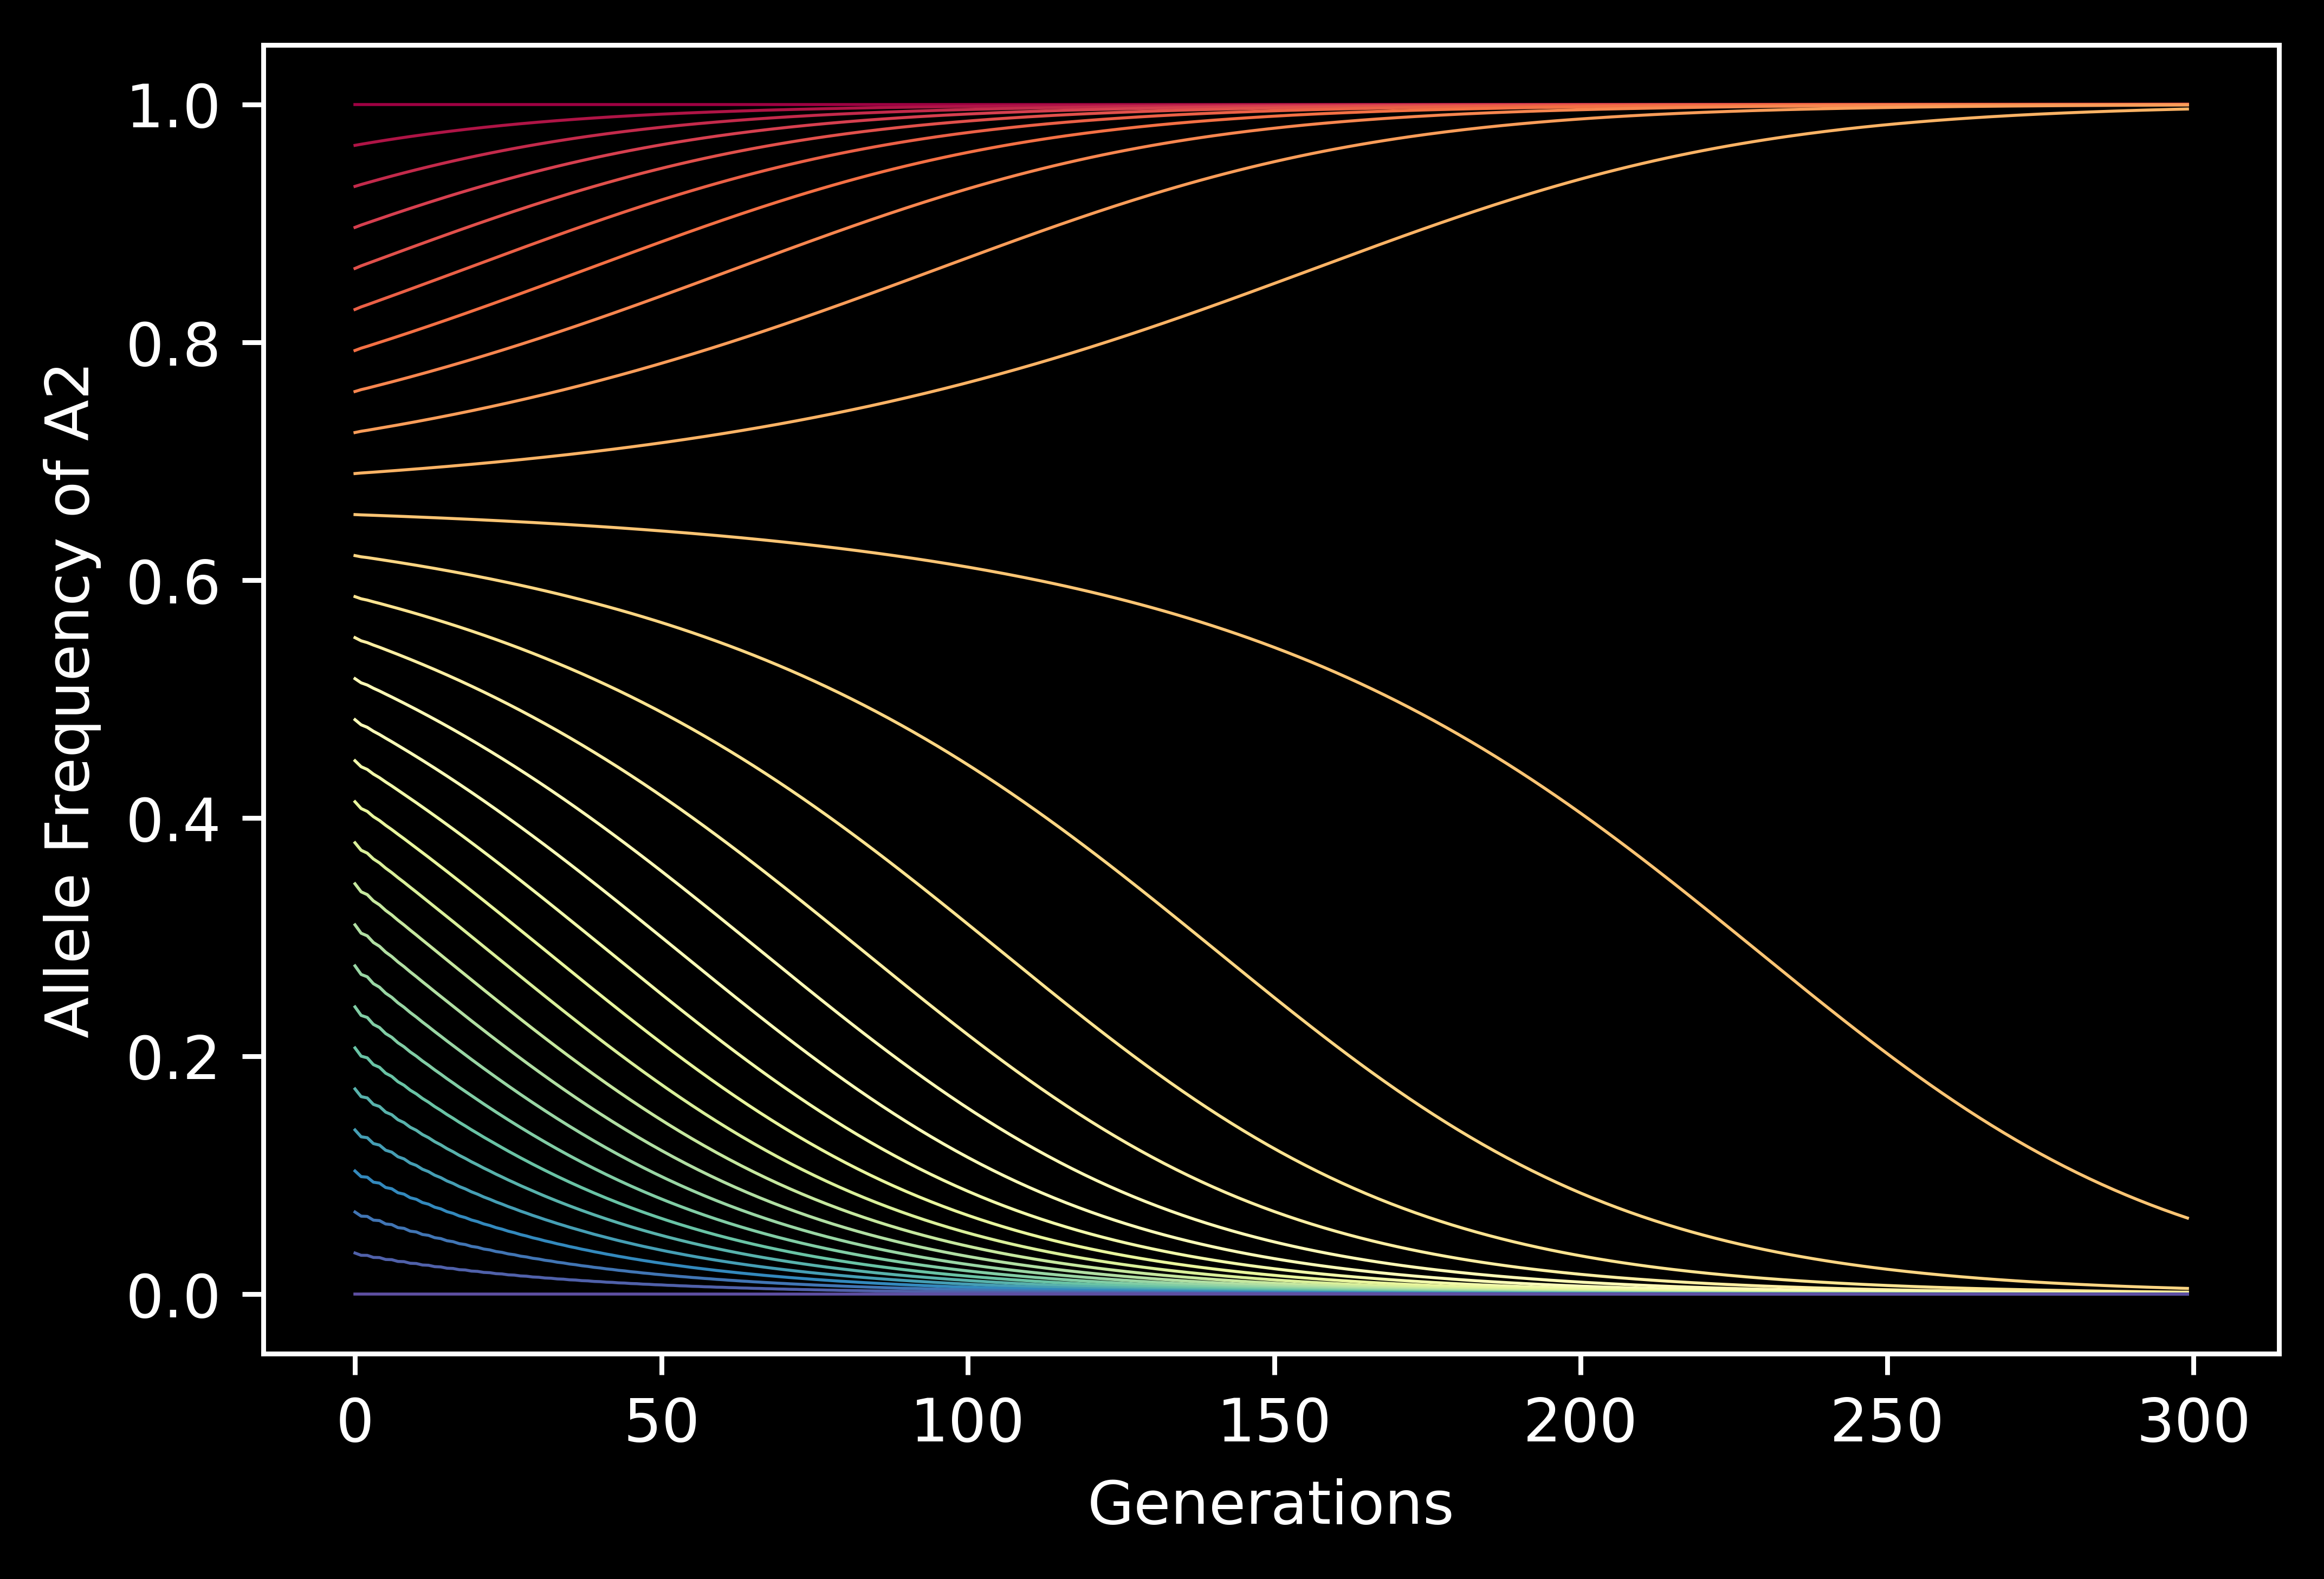

In [8]:
### Heterozygote disadvantage
from numpy import linspace
from matplotlib.cm import viridis,hsv,Spectral #maps between values and colors for our line plot
import matplotlib.pyplot as plt




h = 0.06 #fitness cost of heterozygote
s = 0.03 #fitness cost of qq homozygote
Wpp = 1.0 
Wpq = 1.0 -h #Assume hetrozygote is slightly less fit 
Wqq = 1.0 -s  #Define s as fitness cost of qq homozygote

generations = 300

#Set up the figure
plt.figure(dpi=800)
plt.style.use('dark_background')


#Let's see what happens with a range of starting p values

for p in linspace(0.0,1.0,30):
    q = 1.0 - p
    starting_p = p
    xs = []
    ps = []
    qs = []
    for g in range(generations):
        new_p = HW_with_selection(p,q,Wpp,Wpq,Wqq)
        xs.append(g)
        ps.append(new_p)
        q = 1.0 - p
        qs.append(q)
        p = new_p
   
        
    plot(xs,qs,'-',color = Spectral(starting_p), label='q0 = %f'%(1.0 - starting_p),linewidth=0.50)
        
        
        
#plot(xs,qs,'-b',label='f(A2) = q')
ylabel('Allele Frequency of A2')
xlabel('Generations')
#legend()

Text(0.5, 0, 'Generations')

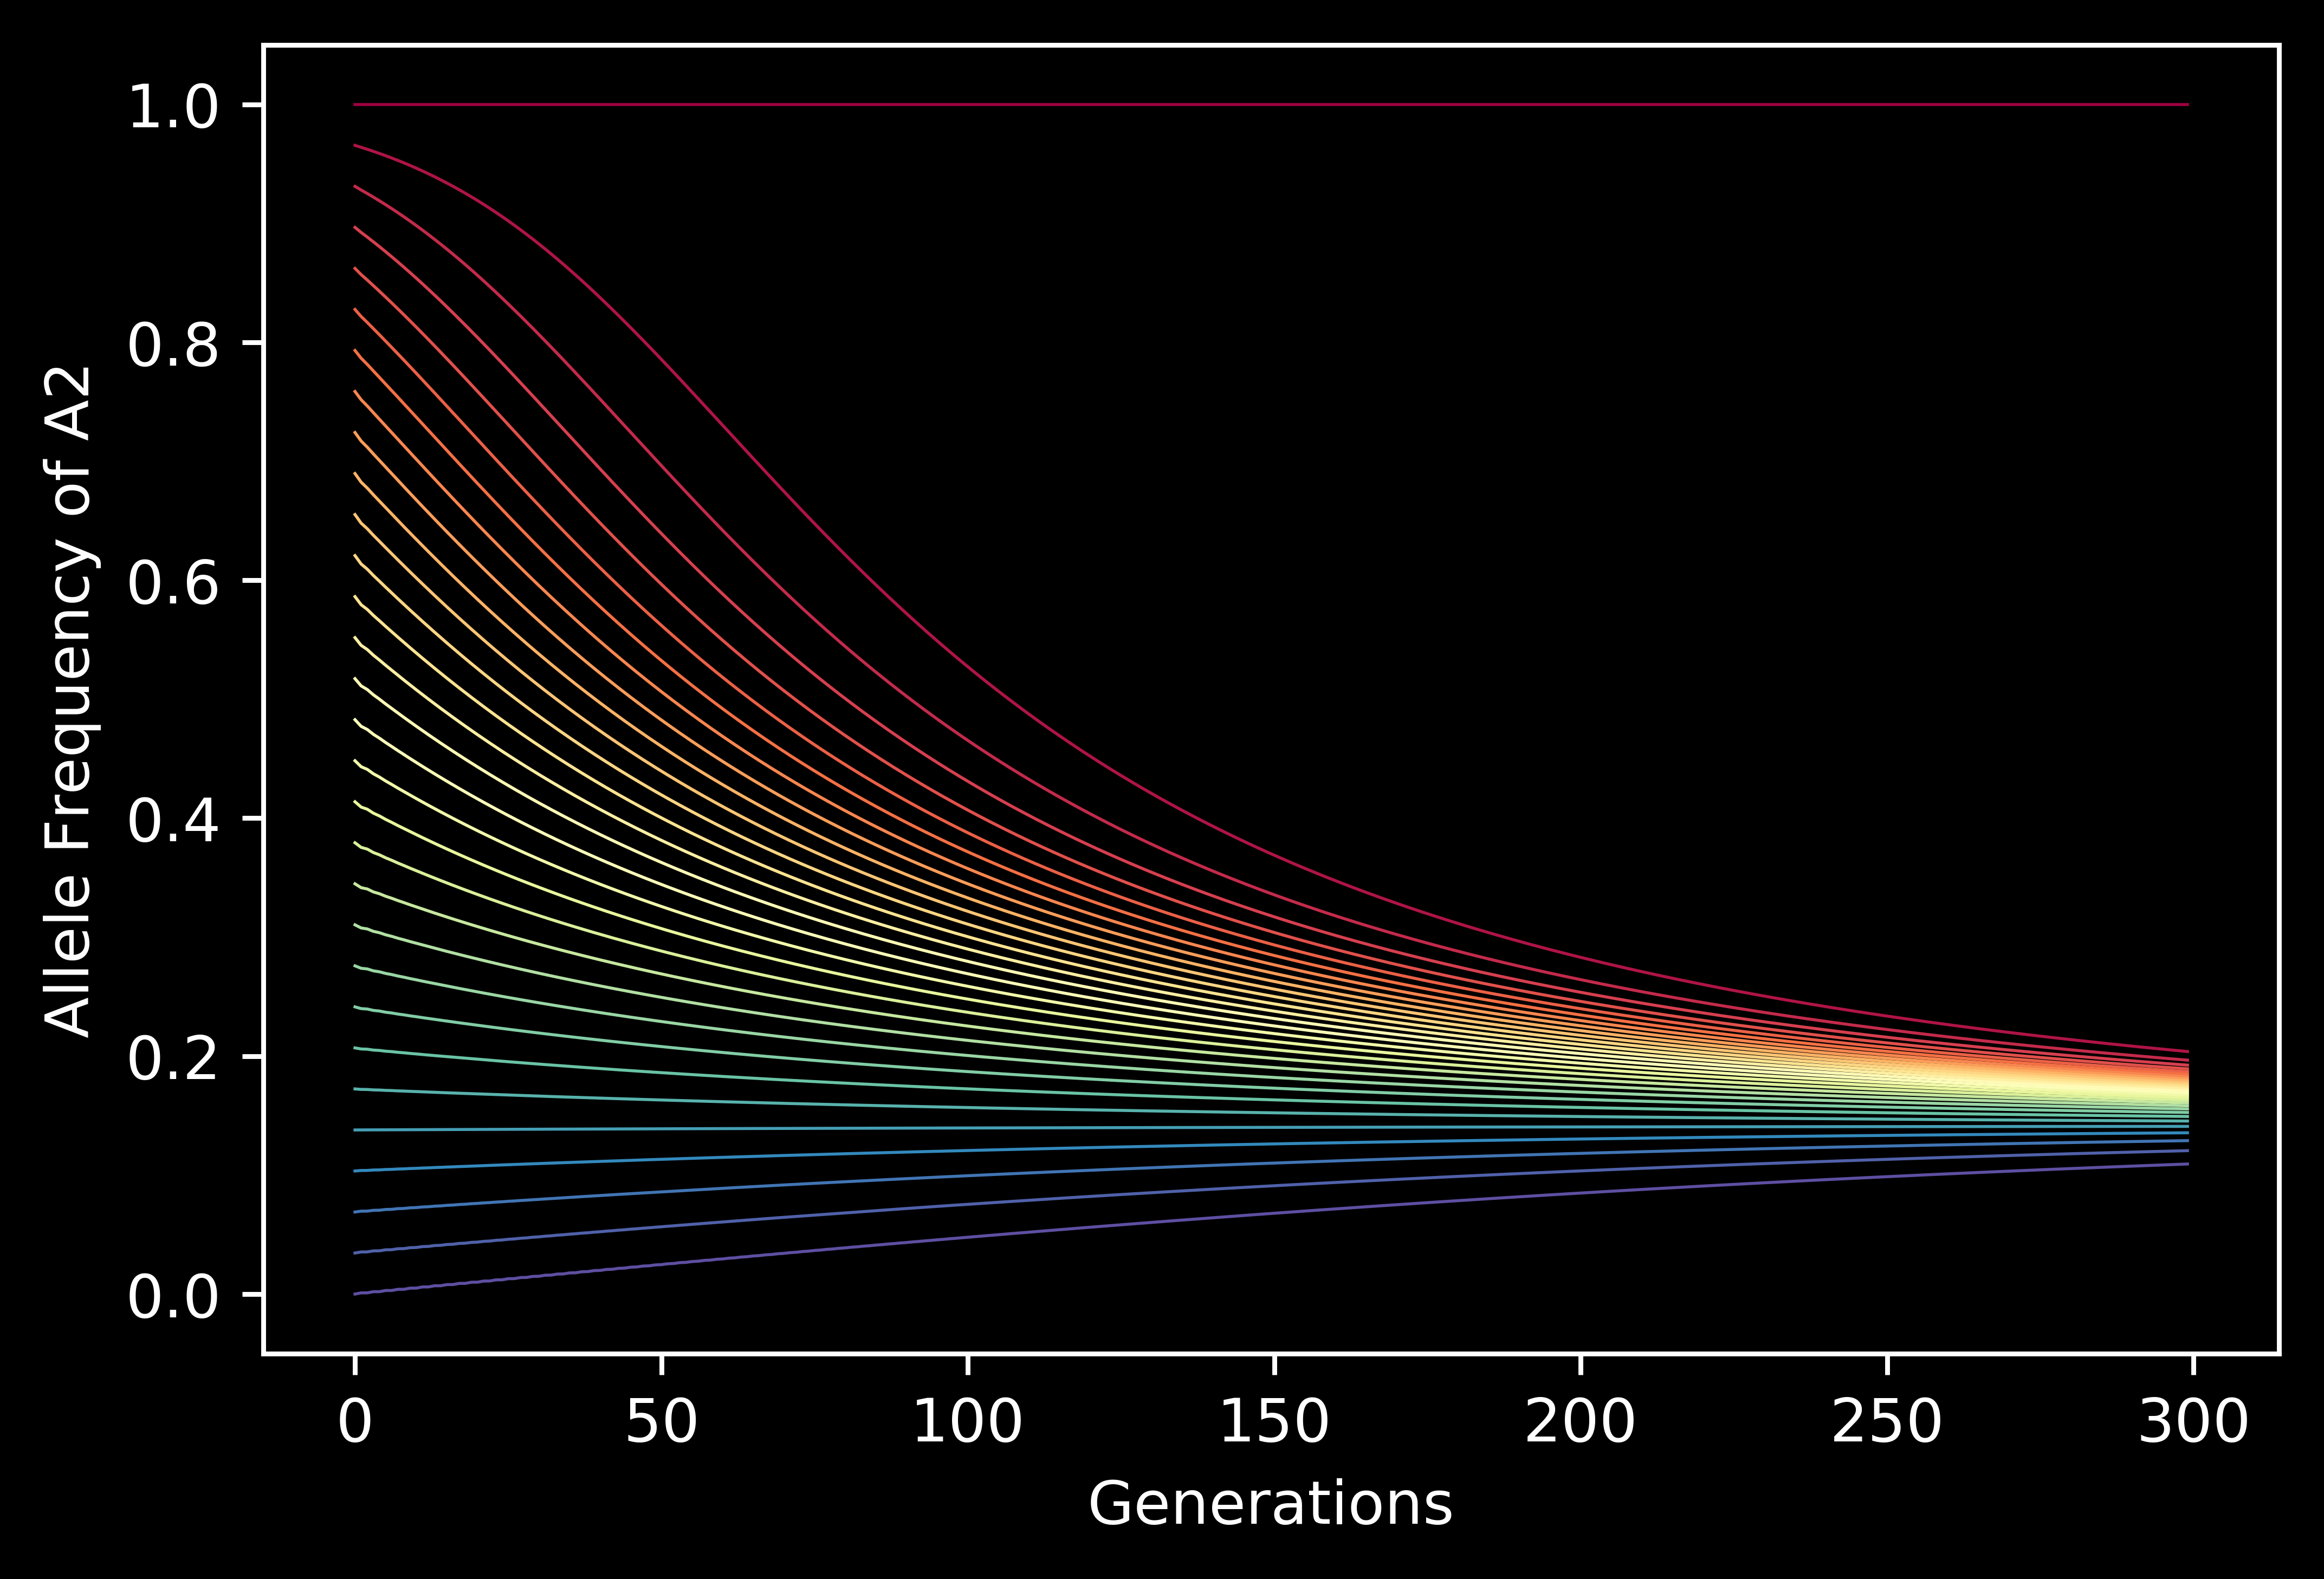

In [24]:
### Mutation Selection Balance
from numpy import linspace
from matplotlib.cm import viridis,hsv,Spectral #maps between values and colors for our line plot
import matplotlib.pyplot as plt



s = 0.05

Wpp = 1.0 
Wpq = 1.0 
Wqq = 1.0 -s  #Define s as fitness cost of qq homozygote
mutation_rate_p_q = 0.001 #mutation rate of p to q (q -> p is assumed 0)

generations = 300

#Set up the figure
plt.figure(dpi=800)
plt.style.use('dark_background')


#Let's see what happens with a range of starting p values

for p in linspace(0.0,1.0,30):
    q = 1.0 - p
    starting_p = p
    xs = []
    ps = []
    qs = []
    for g in range(generations):
        new_p = HW_with_selection(p,q,Wpp,Wpq,Wqq)
        new_p -= new_p * mutation_rate_p_q
        xs.append(g)
        ps.append(new_p)
        q = 1.0 - p
        qs.append(q)
        p = new_p
   
        
    plot(xs,qs,'-',color = Spectral(starting_p), label='q0 = %f'%(1.0 - starting_p),linewidth=0.50)
        
        
        
#plot(xs,qs,'-b',label='f(A2) = q')
ylabel('Allele Frequency of A2')
xlabel('Generations')
#legend()

### Testing nearly neutral theory

Nearly neutral theory predicts that when s << 1/Ne alleles will be effectively neutral. We can text fixation rates of alleles subject to such weak selection using the above code in varying population sizes and see if this is right.

In [52]:
def simulate_genetic_drift_with_selection(n_generations,f_A1=0.5,pop_size=100,\
                                          Wpp=1.0,Wpq=1.0,Wqq = 1.0):
    """Return the frequency of f_A1 over generations"""
    generations = range(n_generations)
    allele_freqs = []
    for generation in generations:
        genotypes = None
        #print(pop_size)
        genotypes = simulate_random_mating(pop_size,f_A1)
        #print(genotypes)
        numerator = (genotypes['A1A1']*Wpp+\
                     0.5*genotypes['A1A2']*Wpq+\
                     0.5*genotypes['A2A1']*Wqq)
        
        denominator = (genotypes['A1A1']*Wpp+\
                       genotypes['A1A2']*Wpq+\
                       genotypes['A2A1']*Wpq+\
                       genotypes['A2A2']*Wqq)
        #print("Numerator:",numerator)
        #print("Denominator:",denominator)
        f_A1 = numerator/denominator       
        allele_freqs.append(f_A1)
    return list(generations),allele_freqs
    

pop_size = 1.000000
pop_size = 2.000000
pop_size = 3.000000
pop_size = 4.000000
pop_size = 5.000000
pop_size = 6.000000
pop_size = 7.000000
pop_size = 8.000000
pop_size = 9.000000
pop_size = 10.000000
pop_size = 25.000000
pop_size = 50.000000
pop_size = 75.000000
pop_size = 100.000000
pop_size = 150.000000
pop_size = 200.000000
pop_size = 300.000000
pop_size = 400.000000


Text(0.5, 0, 'Pop size')

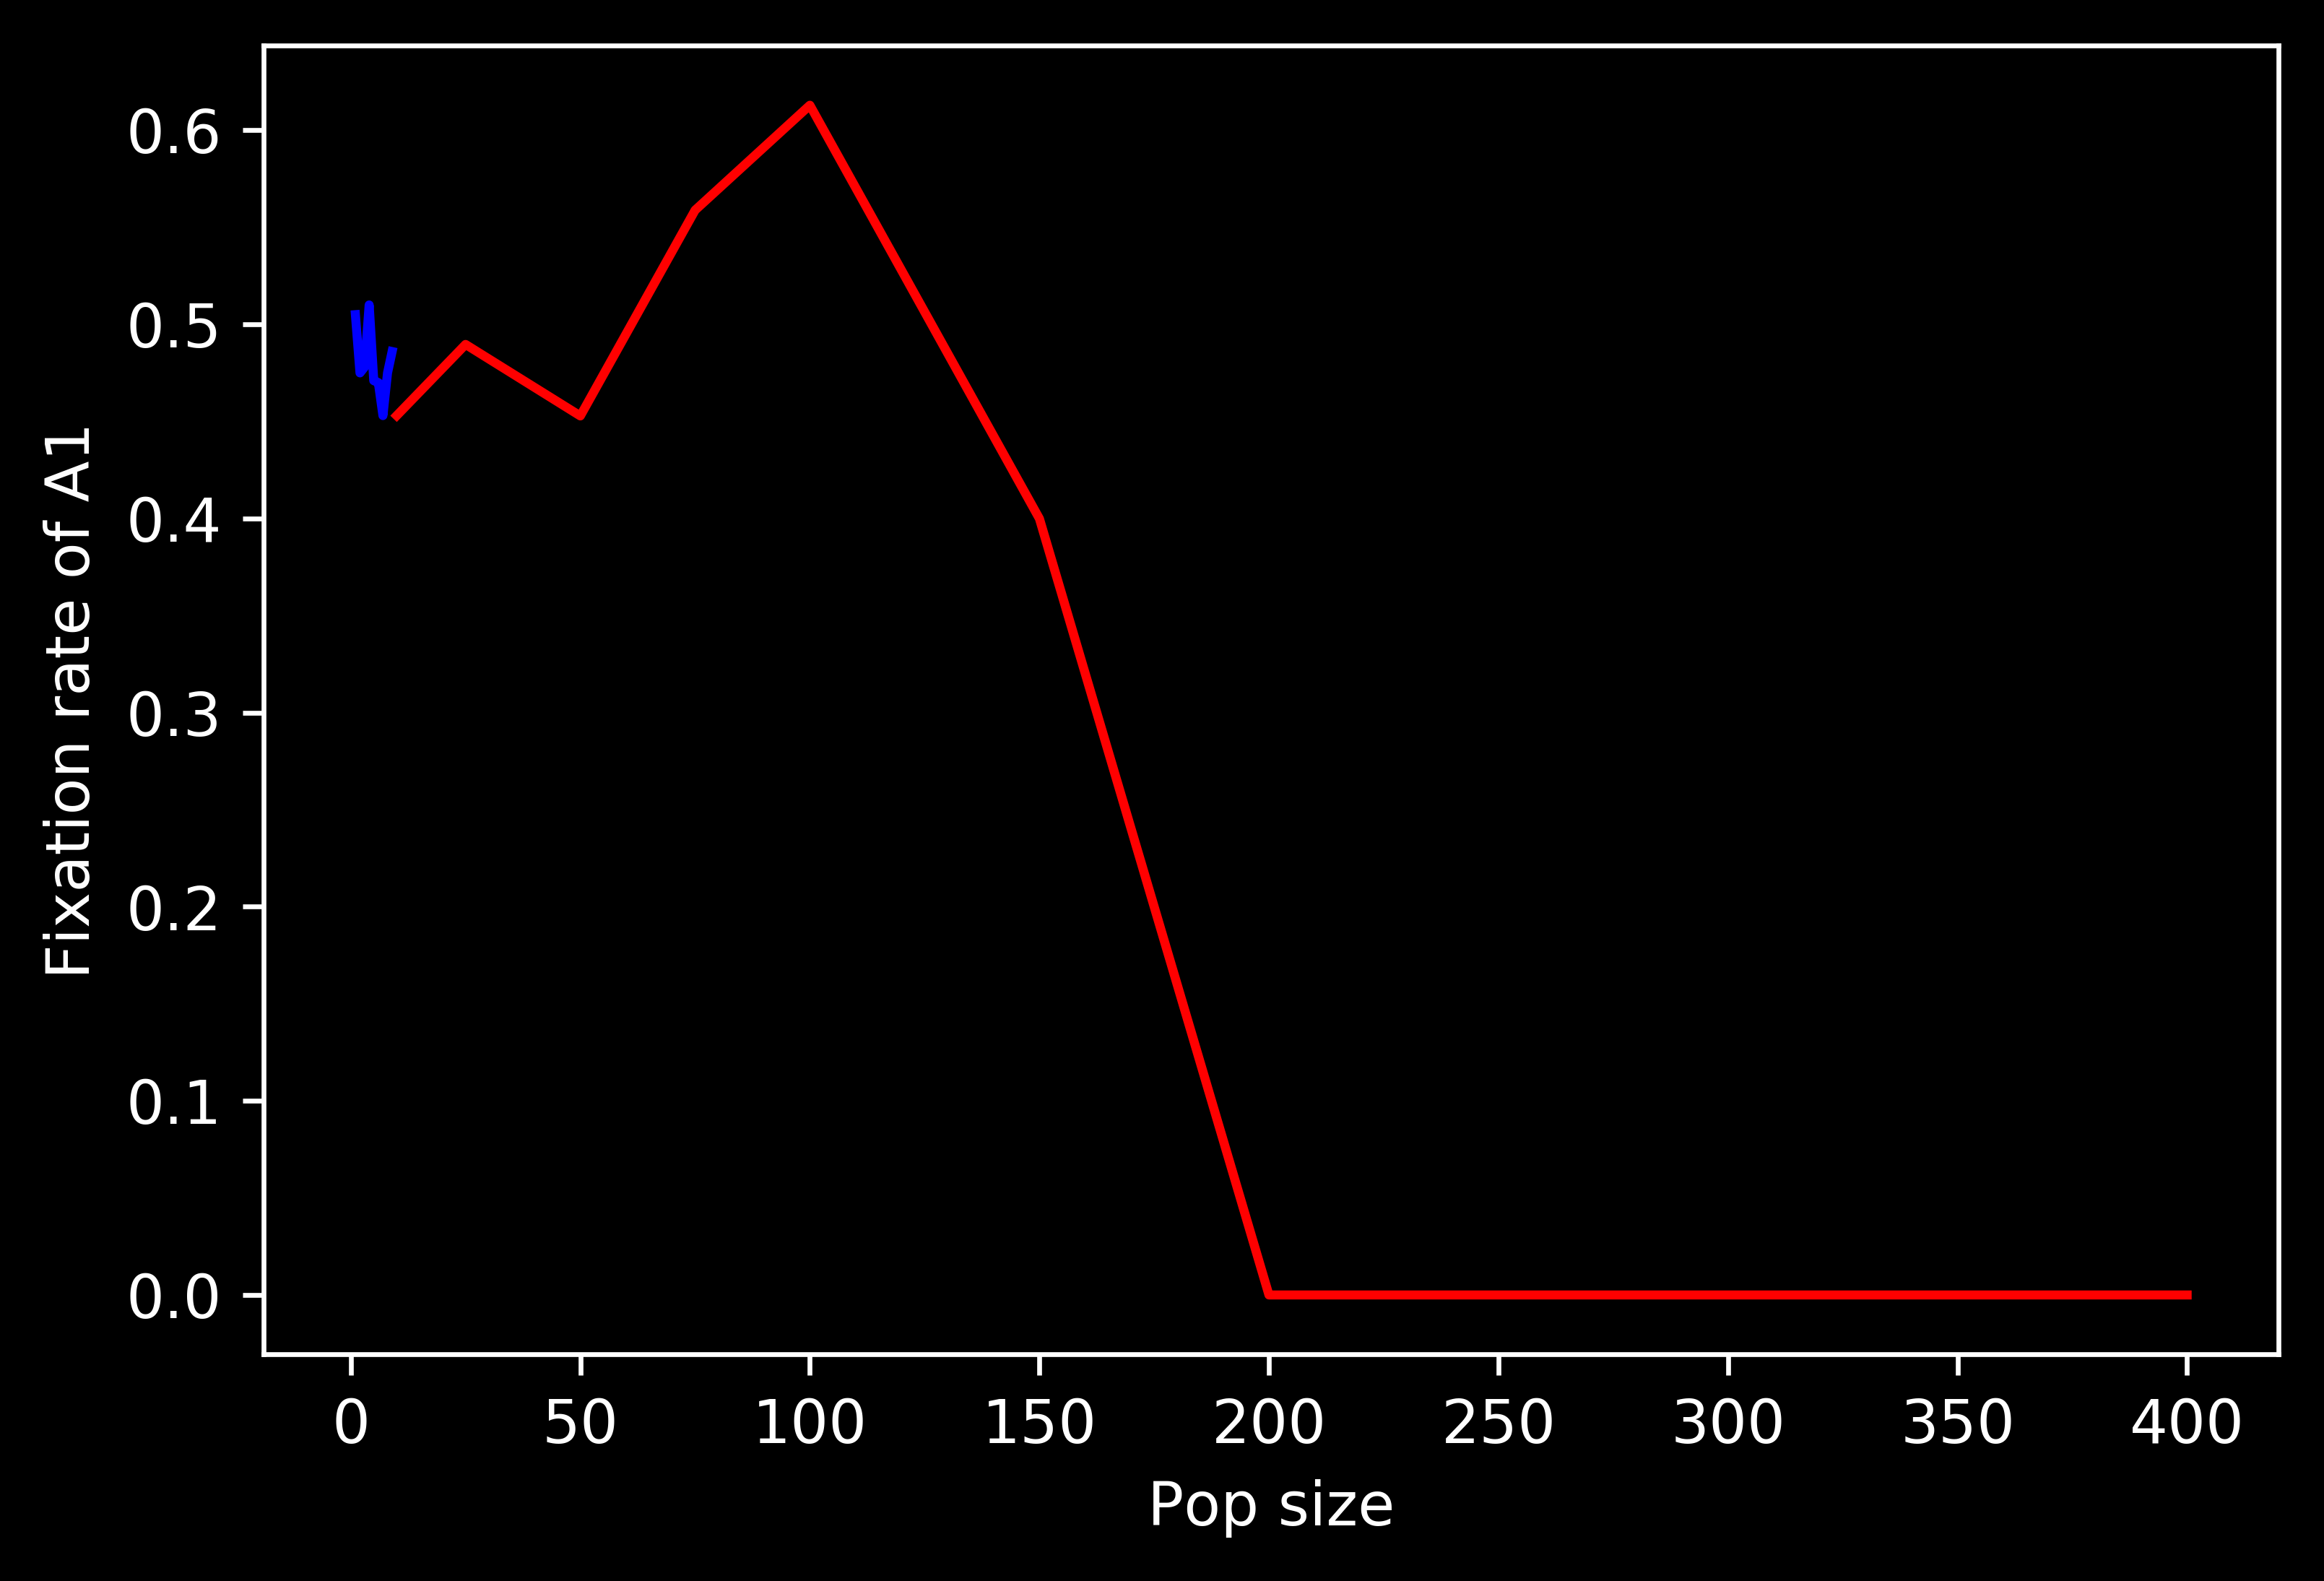

In [70]:
figure(dpi=600)
neutral_xs = [] # will hold s values
neutral_ys = [] # will hold fixation rate
selected_xs = []
selected_ys = []
s = 1.0/10.0
for pop_size in [1,2,3,4,5,6,7,8,9,10,25,50,75,100,150,200,300,400]:
    print("pop_size = %f" %pop_size)
    losses = 0
    fixation = 0
    polymorphic = 0
    for replicate in range(1000):
        #print("replicate %i" %replicate)
        
        generations = 200
        Wpp = 1.0
        Wpq = 1.0
        Wqq = 1.0 - s
        generations,f_A1s = simulate_genetic_drift_with_selection(generations,f_A1=0.5,\
                                                  pop_size=pop_size,\
                                                  Wpp=Wpp,\
                                                  Wpq=Wpq,\
                                                  Wqq=Wqq)
        
        #print("Final allele freq:",f_A1s[-1])    
        if f_A1s[-1] == 0.0:
            #print("Allele lost!")
            losses += 1
        elif f_A1s[-1] == 1.0:
            #print("Allele fixed!")
            fixation += 1
        else:
            #print("Allele polymorphic!")
            polymorphic +=1
    
    #This should include fixation and losses summed over *all* replicates
    fixation_freq = fixation/(losses+fixation+0.001)
    if s < 1/pop_size:
        neutral_xs.append(pop_size)
        neutral_ys.append(fixation_freq)
    else:
        selected_xs.append(pop_size)
        selected_ys.append(fixation_freq)

plot(neutral_xs,neutral_ys,'-',color = 'blue', label='s = %f'%(s),linewidth=1.50)
plot(selected_xs,selected_ys,'-',color = 'red', label='s = %f'%(s),linewidth=1.50)
    
ylabel('Fixation rate of A1')
xlabel('Pop size')

## [Reading Responses & Feedback](https://docs.google.com/forms/d/e/1FAIpQLSeUQPI_JbyKcX1juAFLt5z1CLzC2vTqaCYySUAYCNElNwZqqQ/viewform?usp=pp_url&entry.2118603224=Simulation+-+Simulating+Evolution+by+Mutation,+Selection,+and+Genetic+Drift)